# Инициализация

Загружаем библиотеки необходимые для выполнения кода ноутбука.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'

# === ЭТАП 1 ===

# Загрузка первичных данных

Загружаем первичные данные из файлов:
- tracks.parquet
- catalog_names.parquet
- interactions.parquet

In [3]:
tracks = pd.read_parquet("./tracks.parquet")
catalog_names = pd.read_parquet("./catalog_names.parquet")
interactions = pd.read_parquet("./interactions.parquet")

In [4]:
# Данные о треках — в файле tracks.parquet:

    # track_id — идентификатор музыкального трека;
    # albums —  список идентификаторов альбомов, содержащих трек;
    # artists — список идентификаторов исполнителей трека;
    # genres — список идентификаторов жанров, к которым принадлежит трек.

tracks.head()

,track_id,albums,artists,genres
0,26,"[3, 2490753]",[16],"[11, 21]"
1,38,"[3, 2490753]",[16],"[11, 21]"
2,135,"[12, 214, 2490809]",[84],[11]
3,136,"[12, 214, 2490809]",[84],[11]
4,138,"[12, 214, 322, 72275, 72292, 91199, 213505, 24...",[84],[11]


In [5]:
# Имена артистов, названия альбомов, треков и жанров — в файле catalog_names.parquet:

    # id — идентификатор одной из каталожных единиц (трека, альбома, исполнителя, жанра);
    # type — тип идентификатора;
    # name — имя (название) каталожной единицы.

catalog_names.head()

,id,type,name
0,3,album,Taller Children
1,12,album,Wild Young Hearts
2,13,album,Lonesome Crow
3,17,album,Graffiti Soul
4,26,album,Blues Six Pack


In [6]:
# Данные о том, какие пользователи прослушали тот или иной трек, — в файле interactions.parquet :

    # user_id — идентификатор пользователя,
    # track_id — идентификатор музыкального трека,
    # track_seq — номер места трека в истории пользователя,
    # started_at — дата начала прослушивания трека.

interactions.head()

,user_id,track_id,track_seq,started_at
0,0,99262,1,2022-07-17
1,0,589498,2,2022-07-19
2,0,590262,3,2022-07-21
3,0,590303,4,2022-07-22
4,0,590692,5,2022-07-22


# Обзор данных

Проверяем данные, есть ли с ними явные проблемы.

In [7]:
tracks.info()
# пропусков нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   track_id  1000000 non-null  int64 
 1   albums    1000000 non-null  object
 2   artists   1000000 non-null  object
 3   genres    1000000 non-null  object
dtypes: int64(1), object(3)
memory usage: 30.5+ MB


In [8]:
tracks["track_id"].nunique()
# все идентификаторы треков уникальны - дубликатов нет

1000000

In [9]:
tracks[tracks["albums"].str.len() == 0]
# есть небольшое кол-во пустых списков идентификаторов альбомов (с пустыми для них идентификаторами исполнителей трека и жанров)

,track_id,albums,artists,genres
310821,20200372,[],[],[]
310826,20200380,[],[],[]
312469,20305116,[],[],[]
312474,20305121,[],[],[]
320353,20756854,[],[],[]
326588,21196099,[],[],[]
326592,21196103,[],[],[]
326594,21196105,[],[],[]
326596,21196107,[],[],[]
326598,21196109,[],[],[]


In [10]:
# избавимся от таких track_id (список удаленных track_id сохраним)
track_id_deleted = tracks[tracks["albums"].str.len() == 0]["track_id"]
tracks = tracks[~tracks["track_id"].isin(track_id_deleted)]
tracks

,track_id,albums,artists,genres
0,26,"[3, 2490753]",[16],"[11, 21]"
1,38,"[3, 2490753]",[16],"[11, 21]"
2,135,"[12, 214, 2490809]",[84],[11]
3,136,"[12, 214, 2490809]",[84],[11]
4,138,"[12, 214, 322, 72275, 72292, 91199, 213505, 24...",[84],[11]
...,...,...,...,...
999995,101478482,[21399811],[5540395],"[3, 75]"
999996,101490148,[21403052],[9078726],"[11, 20]"
999997,101493057,[21403883],[11865715],"[44, 75]"
999998,101495927,[21404975],[4462686],"[3, 75]"


In [11]:
tracks[tracks["artists"].str.len() == 0]
# даных по пустым идентификаторам исполнителей трека - 15351 из 1000000

,track_id,albums,artists,genres
146031,3599314,[389925],[],"[68, 86]"
146163,3599591,[389944],[],"[68, 86]"
177544,4790215,[533785],[],"[68, 86]"
218922,10063296,[1083742],[],"[11, 20]"
231455,12122918,[1315834],[],[68]
...,...,...,...,...
999868,101201589,[12649219],[],"[62, 77]"
999876,101219571,[9444321],[],"[62, 83, 77]"
999901,101243616,[11700332],[],"[62, 93]"
999920,101292599,[9331881],[],"[62, 90, 77, 84]"


In [12]:
# избавимся от таких track_id (список удаленных track_id сохраним)
track_id_deleted_2 = tracks[tracks["artists"].str.len() == 0]["track_id"]
tracks = tracks[~tracks["track_id"].isin(track_id_deleted_2)]
tracks

,track_id,albums,artists,genres
0,26,"[3, 2490753]",[16],"[11, 21]"
1,38,"[3, 2490753]",[16],"[11, 21]"
2,135,"[12, 214, 2490809]",[84],[11]
3,136,"[12, 214, 2490809]",[84],[11]
4,138,"[12, 214, 322, 72275, 72292, 91199, 213505, 24...",[84],[11]
...,...,...,...,...
999995,101478482,[21399811],[5540395],"[3, 75]"
999996,101490148,[21403052],[9078726],"[11, 20]"
999997,101493057,[21403883],[11865715],"[44, 75]"
999998,101495927,[21404975],[4462686],"[3, 75]"


In [13]:
tracks[tracks["genres"].str.len() == 0]
# даных по пустым идентификаторам жанров - 3654 из 1000000

,track_id,albums,artists,genres
490,2520,"[249, 163801, 163802, 324616, 17542430, 189498...",[2259],[]
3069,16776,"[1479, 5319, 6093, 8467, 10641, 90867, 163801,...",[978],[]
3077,16801,"[1479, 163801, 9287549, 9377183, 9424994, 1201...",[10520],[]
4192,23752,"[2001, 3722, 4973, 6104, 6558, 23866, 37052, 7...",[13373],[]
6645,38012,"[3147, 60099, 530836, 1115289, 2490724, 818446...",[16758],[]
...,...,...,...,...
997667,99412992,[20764551],[10029101],[]
999192,100497082,[21098340],[15936615],[]
999703,100923319,[21233460],[5271861],[]
999704,100923322,[21233460],[5271861],[]


In [14]:
# избавимся от таких track_id (список удаленных track_id сохраним)
track_id_deleted_3 = tracks[tracks["genres"].str.len() == 0]["track_id"]
tracks = tracks[~tracks["track_id"].isin(track_id_deleted_3)]
tracks
# остается 98% данных по трекам

,track_id,albums,artists,genres
0,26,"[3, 2490753]",[16],"[11, 21]"
1,38,"[3, 2490753]",[16],"[11, 21]"
2,135,"[12, 214, 2490809]",[84],[11]
3,136,"[12, 214, 2490809]",[84],[11]
4,138,"[12, 214, 322, 72275, 72292, 91199, 213505, 24...",[84],[11]
...,...,...,...,...
999995,101478482,[21399811],[5540395],"[3, 75]"
999996,101490148,[21403052],[9078726],"[11, 20]"
999997,101493057,[21403883],[11865715],"[44, 75]"
999998,101495927,[21404975],[4462686],"[3, 75]"


In [15]:
# список удаленных треков
track_id_deleted = track_id_deleted.to_list() + track_id_deleted_2.to_list() + track_id_deleted_3.to_list()
track_id_deleted

[20200372,
 20200380,
 20305116,
 20305121,
 20756854,
 21196099,
 21196103,
 21196105,
 21196107,
 21196109,
 21196111,
 21196116,
 21196117,
 21196118,
 28530632,
 34828749,
 36598340,
 51641225,
 3599314,
 3599591,
 4790215,
 10063296,
 12122918,
 16610995,
 20210042,
 20210069,
 20210109,
 20357639,
 27055330,
 27055333,
 33718622,
 33721289,
 33721303,
 33721304,
 33721305,
 33721309,
 33721310,
 33721311,
 33741212,
 34174106,
 46494965,
 46494967,
 46494968,
 46494969,
 46494971,
 46494972,
 46494974,
 46494975,
 46494977,
 46494978,
 46494979,
 46494981,
 46494983,
 46494984,
 46494985,
 46494987,
 46494988,
 46494989,
 46494990,
 46494991,
 46494992,
 46494993,
 46494994,
 46494996,
 46494997,
 46494999,
 46495000,
 46495001,
 46495003,
 46495004,
 46495005,
 46495006,
 46495540,
 46495541,
 46495542,
 46495544,
 46495545,
 46495546,
 46495548,
 46495551,
 46495554,
 46495555,
 46495556,
 46495560,
 46495562,
 46495563,
 46495566,
 46495570,
 46495571,
 46495573,
 46495574,
 4

In [16]:
catalog_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1812471 entries, 0 to 1812470
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      int64 
 1   type    object
 2   name    object
dtypes: int64(1), object(2)
memory usage: 41.5+ MB


In [17]:
catalog_names["type"].value_counts()
# в каталоге больше всего треков, затем альбомы, артисты и жанры 

type
track     1000000
album      658724
artist     153581
genre         166
Name: count, dtype: int64

In [18]:
len(catalog_names) - catalog_names["id"].nunique()
# есть дубликаты по идентификатору одной из каталожных единиц - 35774 из 1812471

35774

In [19]:
catalog_names[catalog_names['id'].duplicated()]

,id,type,name
658728,12,artist,Phil Everly
658735,34,artist,Miles Davis
658736,36,artist,Baker
658741,87,artist,Michael Schenker
658744,93,artist,Femi Kuti
...,...,...,...
1141043,21314698,track,No Good For You
1141108,21320653,track,Oh!
1141114,21321251,track,Lady in Red
1141142,21327491,track,Waiting Here


In [20]:
catalog_names[catalog_names["id"] == 34]
# получается, что идентификаторы для разных типов могут повторяться. Нужно проверять наличие дубликатов внутри каждого жанра

,id,type,name
7,34,album,Self Taught Learner EP
658735,34,artist,Miles Davis
812339,34,genre,caribbean


In [21]:
print("album")
print(len(catalog_names[catalog_names["type"] == "album"]))
print(catalog_names[catalog_names["type"] == "album"].nunique())
print("----")

print("artist")
print(len(catalog_names[catalog_names["type"] == "artist"]))
print(catalog_names[catalog_names["type"] == "artist"].nunique())
print("----")

print("genre")
print(len(catalog_names[catalog_names["type"] == "genre"]))
print(catalog_names[catalog_names["type"] == "genre"].nunique())
print("----")

print("track")
print(len(catalog_names[catalog_names["type"] == "track"]))
print(catalog_names[catalog_names["type"] == "track"].nunique())
print("----")

# наличие дубликатов внутри каждого жанра не обнаружено

album
658724
id      658724
type         1
name    440616
dtype: int64
----
artist
153581
id      153581
type         1
name    151196
dtype: int64
----
genre
166
id      166
type      1
name    166
dtype: int64
----
track
1000000
id      1000000
type          1
name     530724
dtype: int64
----


In [22]:
len(catalog_names) - catalog_names["name"].nunique()
# есть дубликаты по имени (названию) каталожной единицы. - 867353 из 1812471

867353

In [23]:
catalog_names[catalog_names['name'].duplicated()]

,id,type,name
10,43,album,Blues Six Pack
11,45,album,Blues Six Pack
13,49,album,Graffiti Soul
28,94,album,Jazz Six Pack
29,95,album,Blues Six Pack
...,...,...,...
1812466,101478482,track,На лицо
1812467,101490148,track,Без капли мысли
1812468,101493057,track,SKITTLES
1812469,101495927,track,Москва


In [24]:
catalog_names[catalog_names["name"] == "Blues Six Pack"]
# получается, под разными идентификаторами в каталоге имеются одни и те же альбомы, нужно избавиться от таких данных

,id,type,name
4,26,album,Blues Six Pack
10,43,album,Blues Six Pack
11,45,album,Blues Six Pack
29,95,album,Blues Six Pack
34519,91414,album,Blues Six Pack


In [25]:
catalog_names = catalog_names.drop_duplicates(subset=["type","name"], keep="first")
# осталось 62% данных

In [26]:
# уберем из данных треки из списка track_id_deleted
catalog_names_tracks = catalog_names[catalog_names["type"]=="track"]
catalog_names_others = catalog_names[catalog_names["type"]!="track"]
catalog_names_tracks = catalog_names_tracks[~catalog_names_tracks["id"].isin(track_id_deleted)]
catalog_names = pd.concat([catalog_names_others,catalog_names_tracks],ignore_index=True)
catalog_names
# осталось 61% данных

,id,type,name
0,3,album,Taller Children
1,12,album,Wild Young Hearts
2,13,album,Lonesome Crow
3,17,album,Graffiti Soul
4,26,album,Blues Six Pack
...,...,...,...
1105784,101392428,track,ДСВ 2022
1105785,101399193,track,Аккаунт удалён
1105786,101399197,track,tendril
1105787,101490148,track,Без капли мысли


In [27]:
catalog_names.sort_values(by = "name")
# в именах (названиях) каталожных единиц присутсвуют эмодзи, символы ASCII, либо только знаки препинания.
# фильтровать такие значения тяжело, пока оставим как есть, но будем иметь ввиду

,id,type,name
575388,8865715,artist,\tDrake
670765,1710520,track,!
102514,2081150,album,!
567666,7709071,artist,!
32780,169465,album,! (Знак оклику)
...,...,...,...
390658,14512698,album,💗 Pop y Amor 💗
389309,14404588,album,📚 Música Para Leer 📚
386736,14157216,album,🔥 Regeton Viejito Vol.2 🔥
389388,14405050,album,🚗 Para que te sientas en Camioneta Roja 🚗


In [28]:
interactions.info()
# почти 223 млн взаимодействий

<class 'pandas.core.frame.DataFrame'>
Index: 222629898 entries, 0 to 291
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   user_id     int32         
 1   track_id    int32         
 2   track_seq   int16         
 3   started_at  datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int32(2)
memory usage: 5.4 GB


In [29]:
interactions["user_id"].nunique()
# кол-во уникальных пользователей 1373221, что составляет 0.62% от объема данных взаимодействий

1373221

In [30]:
interactions["track_id"].nunique()
# кол-во уникальных треков 1000000, т.е. прослушаны все треки из tracks
# надо убрать взаимодействия по удаленным track_id

1000000

In [31]:
interactions = interactions[~interactions["track_id"].isin(track_id_deleted)].reset_index(drop=True)
interactions.head()

,user_id,track_id,track_seq,started_at
0,0,99262,1,2022-07-17
1,0,589498,2,2022-07-19
2,0,590262,3,2022-07-21
3,0,590303,4,2022-07-22
4,0,590692,5,2022-07-22


In [32]:
interactions["track_id"].nunique()
# теперь кол-во уникальных треков совпадает с tracks

980977

In [33]:
len(interactions)
# Осталось 99.8% взаимодействий

222184449

In [34]:
interactions[interactions["track_seq"].isnull()]
# пропусков по track_seq нет

,user_id,track_id,track_seq,started_at


In [35]:
interactions["track_seq"].describe().apply(lambda x: f"{x:0.1f}")
# max(track_seq) = 16637
# min(track_seq) = 1
# 75% track_seq меньше 506

# Можно посчитать их за выбросы и удалить из данных

count    222184449.0
mean           462.0
std            824.8
min              1.0
25%             56.0
50%            181.0
75%            505.0
max          16637.0
Name: track_seq, dtype: object

In [36]:
# оставим только взаимодействия с номерами места трека в истории пользователя меньше-равно 1000
interactions = interactions[interactions["track_seq"] <= 1000].reset_index(drop=True)
interactions.head()

,user_id,track_id,track_seq,started_at
0,0,99262,1,2022-07-17
1,0,589498,2,2022-07-19
2,0,590262,3,2022-07-21
3,0,590303,4,2022-07-22
4,0,590692,5,2022-07-22


In [37]:
len(interactions)
# Осталось 88% взаимодействий от начального объема

195486833

In [38]:
interactions[interactions["started_at"].isnull()]
# пропусков по started_at нет

,user_id,track_id,track_seq,started_at


In [39]:
interactions["started_at"].describe()
# min(started_at) = 2022-01-01
# max(started_at) = 2022-12-31

# тут все корректно, данные датированы за весь 2022 год

count                        195486833
mean     2022-08-26 18:29:16.756822016
min                2022-01-01 00:00:00
25%                2022-06-27 00:00:00
50%                2022-09-12 00:00:00
75%                2022-11-07 00:00:00
max                2022-12-31 00:00:00
Name: started_at, dtype: object

In [40]:
print(interactions[["user_id", "track_id", "track_seq", "started_at"]].sample(5, random_state=52).sort_values("user_id").set_index(["user_id", "track_id"]).to_string())
# Пример данных по взаимодействиям

                  track_seq started_at
user_id track_id                      
542691  24301533        154 2022-07-10
611291  36796061        104 2022-11-05
975909  55383891        735 2022-10-02
1184176 83649764        584 2022-11-15
1188687 87292014        366 2022-12-17


# Выводы

Приведём выводы по первому знакомству с данными:
- есть ли с данными явные проблемы,
- какие корректирующие действия (в целом) были предприняты.

По результатам знакомства с данными обнаружились следующие проблемы:
 - в таблице tracks обнаружены пустые списки идентификаторов альбомов, исполнителей трека и жанров. Они были удалены ввиду того, что в требованиях стоит задача создания качественной системы персональных рекомендаций. Оставшийся объем 98%. В дальнейшем  эти треки были исключены из catalog_names и interactions.
 - из таблицы catalog_names исключены дубликаты по парам ["type","name"]. Исключили взаимодействия по удаленным трекам из tracks. В итоге осталось 61% данных. В именах (названиях) каталожных единиц присутсвуют эмодзи, символы ASCII, либо только знаки препинания. С ними ничего не делали, оставили пока как есть.
 - в таблице interactions почти 223 млн взаимодействий с менее 1% уникальных пользователей. Исключили взаимодействия по удаленным трекам из tracks, а также взаимодействия с номерами места трека в истории пользователя > 1000. В результате чего, осталось 88% взаимодействий.

# === ЭТАП 2 ===

# EDA

Распределение количества прослушанных треков.

In [41]:
# добавим колонку started_at_month - месяц взаимодействия
interactions["started_at_month"] = pd.to_datetime(interactions["started_at"]).dt.to_period('M').dt.to_timestamp().dt.month

In [42]:
interactions.head()

,user_id,track_id,track_seq,started_at,started_at_month
0,0,99262,1,2022-07-17,7
1,0,589498,2,2022-07-19,7
2,0,590262,3,2022-07-21,7
3,0,590303,4,2022-07-22,7
4,0,590692,5,2022-07-22,7


In [43]:
interactions_by_month = interactions.groupby("started_at_month").agg(events=("started_at", "count"), users=("user_id", "nunique")).reset_index()
interactions_by_month

,started_at_month,events,users
0,1,2406028,126127
1,2,4405364,227693
2,3,7199997,343667
3,4,9379699,452657
4,5,12403231,566908
5,6,14672283,672069
6,7,17982750,781811
7,8,21037506,883173
8,9,23438460,966781
9,10,27321653,1039508


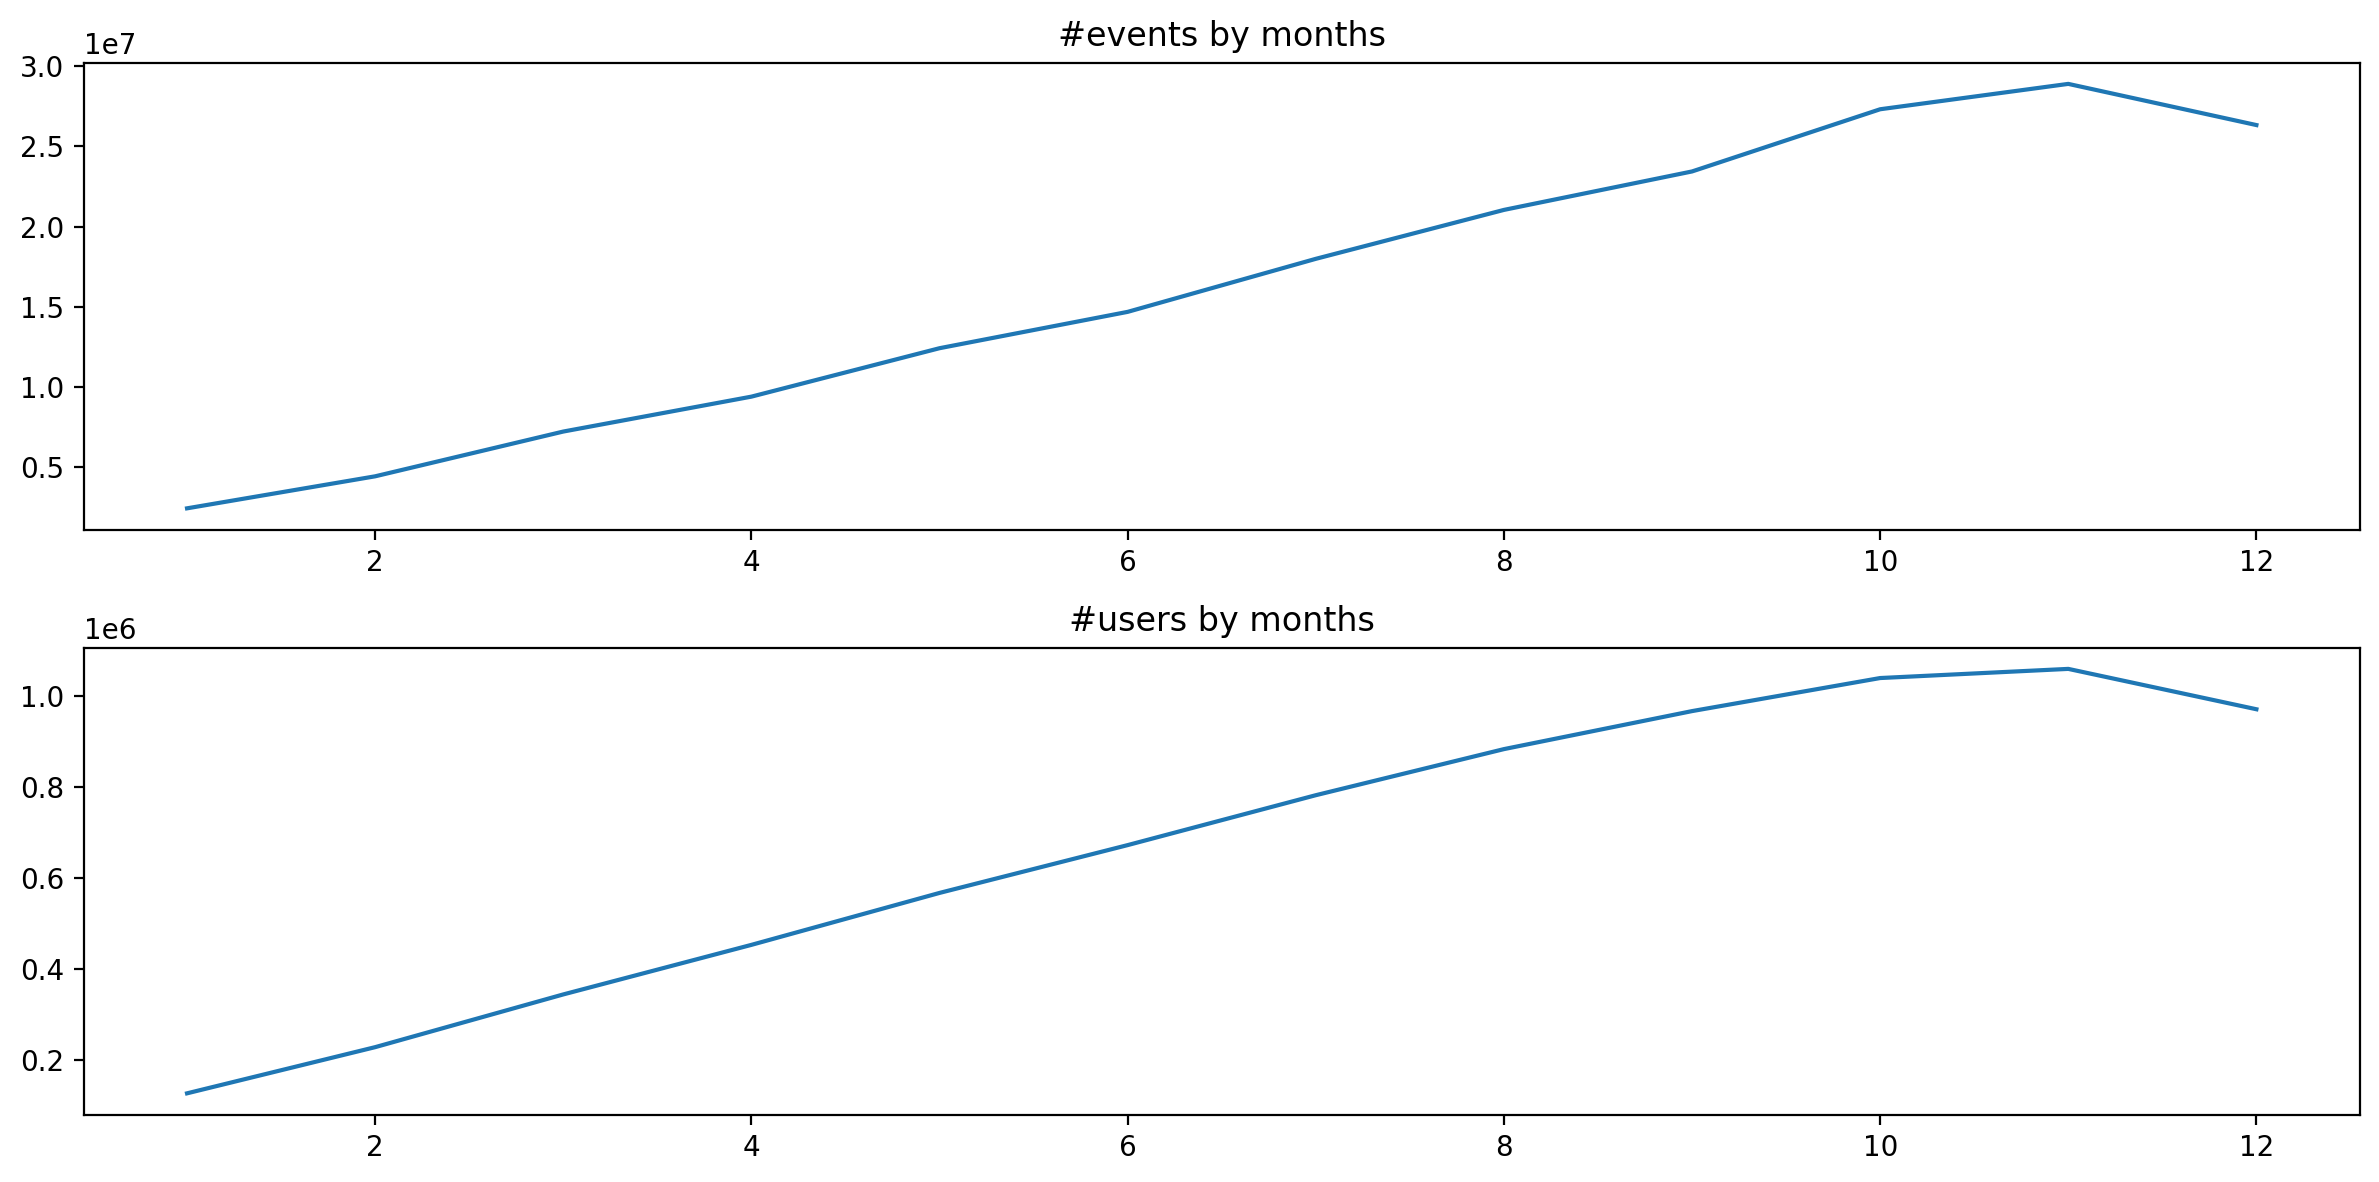

In [44]:
# распределение взаимодействий в течение года

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

ax = axs[0]
ax.plot(interactions_by_month["started_at_month"], interactions_by_month["events"])
ax.set_title("#events by months")

ax = axs[1]
ax.plot(interactions_by_month["started_at_month"], interactions_by_month["users"])
ax.set_title("#users by months")

fig.tight_layout()
# популярность сервиса увеличивалось в течение года (вероятно из-за перетока пользователей с других похожих сервисов)  

Наиболее популярные треки

In [45]:
# группируем по track_id и считаем кол-во уникальных пользователей, которые взаимодействовали с треком
interactions_by_track = interactions.groupby("track_id").agg(users=("user_id", "nunique")).reset_index()
interactions_by_track

,track_id,users
0,26,5
1,38,8
2,135,16
3,136,7
4,138,17
...,...,...
980190,101478482,5
980191,101490148,59
980192,101493057,5
980193,101495927,17


In [46]:
# получим идентификаторы ТОП-100 треков за год
interactions_by_track_top_100 = interactions_by_track.sort_values(by="users",ascending=False).head(100).reset_index(drop=True)
interactions_by_track_top_100

,track_id,users
0,53404,111062
1,33311009,102762
2,178529,101913
3,35505245,97421
4,795836,84546
...,...,...
95,9282507,49261
96,33308946,49157
97,630670,49027
98,2192826,49016


In [47]:
# добавим идентификаторы альбомов, артистов и жанров
interactions_by_track_top_100 = interactions_by_track_top_100.merge(tracks, on="track_id", how="left")
interactions_by_track_top_100

,track_id,users,albums,artists,genres
0,53404,111062,"[4367, 89708, 294911, 294912, 294914, 297393, ...",[9262],"[13, 14, 102]"
1,33311009,102762,"[4440454, 4456609, 4482682, 4882996, 5072976, ...",[675068],"[14, 102]"
2,178529,101913,"[18113, 21924, 21940, 488052, 10009799]",[36800],"[41, 47]"
3,35505245,97421,"[4431303, 20559909]","[4611844, 588511]","[3, 75]"
4,795836,84546,"[88770, 296297, 297576, 302579, 303469, 558376...",[680],"[11, 14, 102]"
...,...,...,...,...,...
95,9282507,49261,"[979404, 16409235]",[1462419],"[2, 102]"
96,33308946,49157,[4072205],[41133],"[5, 102]"
97,630670,49027,"[62233, 67454, 67456, 73694, 73724, 73757, 737...",[64592],[50]
98,2192826,49016,"[217019, 11805582]",[41098],"[2, 102]"


In [48]:
# новые колонки - первые значения списков из albums, artists, genres
interactions_by_track_top_100["album_1"] = interactions_by_track_top_100["albums"].str[0]
interactions_by_track_top_100["artist_1"] = interactions_by_track_top_100["artists"].str[0]
interactions_by_track_top_100["genre_1"] = interactions_by_track_top_100["genres"].str[0]
interactions_by_track_top_100

,track_id,users,albums,artists,genres,album_1,artist_1,genre_1
0,53404,111062,"[4367, 89708, 294911, 294912, 294914, 297393, ...",[9262],"[13, 14, 102]",4367,9262,13
1,33311009,102762,"[4440454, 4456609, 4482682, 4882996, 5072976, ...",[675068],"[14, 102]",4440454,675068,14
2,178529,101913,"[18113, 21924, 21940, 488052, 10009799]",[36800],"[41, 47]",18113,36800,41
3,35505245,97421,"[4431303, 20559909]","[4611844, 588511]","[3, 75]",4431303,4611844,3
4,795836,84546,"[88770, 296297, 297576, 302579, 303469, 558376...",[680],"[11, 14, 102]",88770,680,11
...,...,...,...,...,...,...,...,...
95,9282507,49261,"[979404, 16409235]",[1462419],"[2, 102]",979404,1462419,2
96,33308946,49157,[4072205],[41133],"[5, 102]",4072205,41133,5
97,630670,49027,"[62233, 67454, 67456, 73694, 73724, 73757, 737...",[64592],[50],62233,64592,50
98,2192826,49016,"[217019, 11805582]",[41098],"[2, 102]",217019,41098,2


In [49]:
# заменим новые колонки album_1, artist_1, genre_1 именами из catalog_names
interactions_by_track_top_100["track"] = interactions_by_track_top_100.merge(catalog_names[catalog_names["type"]=="track"], left_on="track_id",right_on="id",how="left")["name"]
interactions_by_track_top_100["album_1"] = interactions_by_track_top_100.merge(catalog_names[catalog_names["type"]=="album"], left_on="album_1",right_on="id",how="left")["name"]
interactions_by_track_top_100["artist_1"] = interactions_by_track_top_100.merge(catalog_names[catalog_names["type"]=="artist"], left_on="artist_1",right_on="id",how="left")["name"]
interactions_by_track_top_100["genre_1"] = interactions_by_track_top_100.merge(catalog_names[catalog_names["type"]=="genre"], left_on="genre_1",right_on="id",how="left")["name"]
interactions_by_track_top_100

,track_id,users,albums,artists,genres,album_1,artist_1,genre_1,track
0,53404,111062,"[4367, 89708, 294911, 294912, 294914, 297393, ...",[9262],"[13, 14, 102]",Nevermind,Nirvana,alternative,NaN
1,33311009,102762,"[4440454, 4456609, 4482682, 4882996, 5072976, ...",[675068],"[14, 102]",Shape Of Pop,Imagine Dragons,rock,NaN
2,178529,101913,"[18113, 21924, 21940, 488052, 10009799]",[36800],"[41, 47]",Meteora,Linkin Park,numetal,NaN
3,35505245,97421,"[4431303, 20559909]","[4611844, 588511]","[3, 75]",NaN,Miyagi & Эндшпиль,rusrap,NaN
4,795836,84546,"[88770, 296297, 297576, 302579, 303469, 558376...",[680],"[11, 14, 102]",Ten Summoner's Tales,Sting,pop,NaN
...,...,...,...,...,...,...,...,...,...
95,9282507,49261,"[979404, 16409235]",[1462419],"[2, 102]",NaN,АнимациЯ,rusrock,NaN
96,33308946,49157,[4072205],[41133],"[5, 102]",Family бізнес,Бумбокс,ukrrock,NaN
97,630670,49027,"[62233, 67454, 67456, 73694, 73724, 73757, 737...",[64592],[50],"Rise And Fall, Rage And Grace",The Offspring,punk,"You're Gonna Go Far, Kid"
98,2192826,49016,"[217019, 11805582]",[41098],"[2, 102]",Морская,Мумий Тролль,rusrock,Владивосток 2000


In [50]:
catalog_names_tracks[catalog_names_tracks["id"]==53404]
# во взаимодействиях есть треки, названий которых нет в catalog_names

,id,type,name


In [51]:
# топ треки
interactions_by_track_top_100[~interactions_by_track_top_100["track"].isnull()][["artist_1","track"]]
# только 37 топ треков из 100 имеют названия

,artist_1,track
5,KALEO,Way Down We Go
6,Ed Sheeran,Shape of You
10,The Cranberries,Zombie
17,Hozier,Take Me To Church
18,Billie Eilish,bad guy
20,Sub Urban,Cradles
32,Red Hot Chili Peppers,Californication
34,Zivert,Зелёные волны
37,Земфира,ИСКАЛА
39,Galibri & Mavik,Федерико Феллини


Наиболее популярные жанры

In [52]:
# список топ жанров
d = {}
for i in interactions_by_track_top_100["genres"]:
    for j in i:
        d[j] = d.get(j, 0) + 1

top_genres_df = pd.DataFrame.from_dict(d, orient='index').reset_index().rename(columns={0:"count"})
top_genres_df = top_genres_df.merge(catalog_names[catalog_names["type"]=="genre"], left_on="index",right_on="id",how="left").sort_values(by = "count", ascending=False)
top_genres_df = top_genres_df.drop(columns=["index","type"]).set_index("name")
top_genres_df

,count,id
name,,
pop,34,11
allrock,26,102
ruspop,23,20
rock,13,14
rap,9,75
dance,9,16
rusrock,8,2
indie,8,70
rusrap,7,3


In [53]:
# список топ альбомов
d = {}
for i in interactions_by_track_top_100["albums"]:
    for j in i:
        d[j] = d.get(j, 0) + 1

top_albums_df = pd.DataFrame.from_dict(d, orient='index').reset_index().rename(columns={0:"count"})
top_albums_df = top_albums_df.merge(catalog_names[catalog_names["type"]=="album"], left_on="index",right_on="id",how="left").sort_values(by = "count", ascending=False)
top_albums_df = top_albums_df.drop(columns=["index","type"]).set_index("name")
top_albums_df[~top_albums_df["id"].isnull()]

,count,id
name,,
Greatest Rock Hits,7,12688381.0
Classic Rock Hits 2022,6,20653036.0
Game Day Rock Hits 2022,5,20920071.0
The Best BBQ Album In The World...Ever!,5,17494105.0
Sweat: Rock,5,16828669.0
...,...,...
Rock For All,1,13706354.0
Lifting Weights 2021,1,13613124.0
Running 100-120 BPM,1,13552372.0


In [54]:
# список топ артистов
d = {}
for i in interactions_by_track_top_100["artists"]:
    for j in i:
        d[j] = d.get(j, 0) + 1

top_artists_df = pd.DataFrame.from_dict(d, orient='index').reset_index().rename(columns={0:"count"})
top_artists_df = top_artists_df.merge(catalog_names[catalog_names["type"]=="artist"], left_on="index",right_on="id",how="left").sort_values(by = "count", ascending=False)
top_artists_df = top_artists_df.drop(columns=["index","type"]).set_index("name")
top_artists_df[~top_artists_df["id"].isnull()]

,count,id
name,,
Imagine Dragons,4,675068.0
HammAli & Navai,4,5129397.0
Zivert,4,5007577.0
Би-2,3,41114.0
NILETTO,3,4944372.0
...,...,...
Danelle Sandoval,1,4445076.0
Burak Yeter,1,323672.0
Tones And I,1,7847834.0


Треки, которые никто не прослушал

In [55]:
tracks_not_listened = tracks[~tracks["track_id"].isin(interactions_by_track["track_id"].drop_duplicates(keep="first"))]
tracks_not_listened
# в tracks имеется 782 трека, которых нет во взаимодействиях

,track_id,albums,artists,genres
90262,794974,"[88665, 88994, 1623073, 7686378, 8853242, 1861...",[7147],"[14, 59, 102]"
90288,795003,"[88665, 89404, 8853242, 13968842, 18612103]",[7147],"[14, 102]"
93207,811742,"[90645, 2460505]",[1859],"[14, 102]"
173498,4552879,[513284],"[818329, 818334]",[21]
177245,4785024,[532968],[7147],"[59, 102]"
...,...,...,...,...
999574,100845795,[21208402],[4725315],"[47, 161]"
999637,100858668,[21213038],[164404],"[2, 102]"
999659,100860095,[21213643],"[11314, 4898629]","[59, 102]"
999802,101056594,[21275172],"[4082930, 5406856]",[68]


In [56]:
interactions_by_track[interactions_by_track["track_id"]==794974]

,track_id,users


In [57]:
# попробуем выяснить по ним информацию
tracks_not_listened["album_1"] = tracks_not_listened["albums"].str[0]
tracks_not_listened["artist_1"] = tracks_not_listened["artists"].str[0]
tracks_not_listened["genre_1"] = tracks_not_listened["genres"].str[0]
tracks_not_listened["track"] = tracks_not_listened.merge(catalog_names[catalog_names["type"]=="track"], left_on="track_id",right_on="id",how="left")["name"]
tracks_not_listened["album_1"] = tracks_not_listened.merge(catalog_names[catalog_names["type"]=="album"], left_on="album_1",right_on="id",how="left")["name"]
tracks_not_listened["artist_1"] = tracks_not_listened.merge(catalog_names[catalog_names["type"]=="artist"], left_on="artist_1",right_on="id",how="left")["name"]
tracks_not_listened["genre_1"] = tracks_not_listened.merge(catalog_names[catalog_names["type"]=="genre"], left_on="genre_1",right_on="id",how="left")["name"]
tracks_not_listened

/tmp/ipykernel_11916/3910570885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks_not_listened["album_1"] = tracks_not_listened["albums"].str[0]
/tmp/ipykernel_11916/3910570885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks_not_listened["artist_1"] = tracks_not_listened["artists"].str[0]
/tmp/ipykernel_11916/3910570885.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,track_id,albums,artists,genres,album_1,artist_1,genre_1,track
90262,794974,"[88665, 88994, 1623073, 7686378, 8853242, 1861...",[7147],"[14, 59, 102]",NaN,NaN,NaN,NaN
90288,795003,"[88665, 89404, 8853242, 13968842, 18612103]",[7147],"[14, 102]",NaN,NaN,NaN,NaN
93207,811742,"[90645, 2460505]",[1859],"[14, 102]",NaN,NaN,NaN,NaN
173498,4552879,[513284],"[818329, 818334]",[21],NaN,NaN,NaN,NaN
177245,4785024,[532968],[7147],"[59, 102]",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
999574,100845795,[21208402],[4725315],"[47, 161]",NaN,NaN,NaN,NaN
999637,100858668,[21213038],[164404],"[2, 102]",NaN,NaN,NaN,NaN
999659,100860095,[21213643],"[11314, 4898629]","[59, 102]",NaN,NaN,NaN,NaN
999802,101056594,[21275172],"[4082930, 5406856]",[68],NaN,NaN,NaN,NaN


In [58]:
tracks_not_listened[~tracks_not_listened["track"].isnull()]
# по этим трекам нет информации в catalog_names

,track_id,albums,artists,genres,album_1,artist_1,genre_1,track


# Преобразование данных

Преобразуем данные в формат, более пригодный для дальнейшего использования в расчётах рекомендаций.

In [59]:
# раскроем все списки в tracks и добавим к ним информацию из catalog_names
tracks = tracks.explode("albums").explode("artists").explode("genres").reset_index(drop=True)
tracks

,track_id,albums,artists,genres
0,26,3,16,11
1,26,3,16,21
2,26,2490753,16,11
3,26,2490753,16,21
4,38,3,16,11
...,...,...,...,...
6686875,101493057,21403883,11865715,75
6686876,101495927,21404975,4462686,3
6686877,101495927,21404975,4462686,75
6686878,101521819,21414638,5056591,3


In [60]:
tracks = tracks.rename(columns={"albums":"album_id","artists":"artist_id","genres":"genre_id"})
tracks

,track_id,album_id,artist_id,genre_id
0,26,3,16,11
1,26,3,16,21
2,26,2490753,16,11
3,26,2490753,16,21
4,38,3,16,11
...,...,...,...,...
6686875,101493057,21403883,11865715,75
6686876,101495927,21404975,4462686,3
6686877,101495927,21404975,4462686,75
6686878,101521819,21414638,5056591,3


In [61]:
tracks["track_name"] = tracks.merge(catalog_names[catalog_names["type"]=="track"],left_on="track_id",right_on="id",how="left")["name"]
tracks["album_name"] = tracks.merge(catalog_names[catalog_names["type"]=="album"],left_on="album_id",right_on="id",how="left")["name"]
tracks["artist_name"] = tracks.merge(catalog_names[catalog_names["type"]=="artist"],left_on="artist_id",right_on="id",how="left")["name"]
tracks["genre_name"] = tracks.merge(catalog_names[catalog_names["type"]=="genre"],left_on="genre_id",right_on="id",how="left")["name"]
tracks

,track_id,album_id,artist_id,genre_id,track_name,album_name,artist_name,genre_name
0,26,3,16,11,Complimentary Me,Taller Children,Elizabeth & the Catapult,pop
1,26,3,16,21,Complimentary Me,Taller Children,Elizabeth & the Catapult,folk
2,26,2490753,16,11,Complimentary Me,NaN,Elizabeth & the Catapult,pop
3,26,2490753,16,21,Complimentary Me,NaN,Elizabeth & the Catapult,folk
4,38,3,16,11,Momma's Boy,Taller Children,Elizabeth & the Catapult,pop
...,...,...,...,...,...,...,...,...
6686875,101493057,21403883,11865715,75,SKITTLES,SKITTLES,WhyBaby?,rap
6686876,101495927,21404975,4462686,3,NaN,NaN,NaN,rusrap
6686877,101495927,21404975,4462686,75,NaN,NaN,NaN,rap
6686878,101521819,21414638,5056591,3,NaN,NaN,Джарахов,rusrap


In [62]:
# оставим только полные данные в tracks
tracks = tracks.dropna().reset_index(drop=True)
tracks

,track_id,album_id,artist_id,genre_id,track_name,album_name,artist_name,genre_name
0,26,3,16,11,Complimentary Me,Taller Children,Elizabeth & the Catapult,pop
1,26,3,16,21,Complimentary Me,Taller Children,Elizabeth & the Catapult,folk
2,38,3,16,11,Momma's Boy,Taller Children,Elizabeth & the Catapult,pop
3,38,3,16,21,Momma's Boy,Taller Children,Elizabeth & the Catapult,folk
4,135,12,84,11,Atticus,Wild Young Hearts,Noisettes,pop
...,...,...,...,...,...,...,...,...
2916184,101392428,21375241,675102,75,ДСВ 2022,ДСВ 2022,Типси Тип,rap
2916185,101490148,21403052,9078726,11,Без капли мысли,Без капли мысли,Даня Милохин,pop
2916186,101490148,21403052,9078726,20,Без капли мысли,Без капли мысли,Даня Милохин,ruspop
2916187,101493057,21403883,11865715,44,SKITTLES,SKITTLES,WhyBaby?,foreignrap


In [63]:
# соберем обратно в списки данные по трекам
tracks = tracks.groupby("track_id").agg({'album_id':lambda x: list(set(list(x))),
                               'artist_id':lambda x: list(set(list(x))),
                               'genre_id':lambda x: list(set(list(x))),
                               'track_name':lambda x: list(set(list(x))),
                               'album_name':lambda x: list(set(list(x))),
                               'artist_name':lambda x: list(set(list(x))),
                               'genre_name':lambda x: list(set(list(x)))}).reset_index()
tracks

,track_id,album_id,artist_id,genre_id,track_name,album_name,artist_name,genre_name
0,26,[3],[16],"[11, 21]",[Complimentary Me],[Taller Children],[Elizabeth & the Catapult],"[pop, folk]"
1,38,[3],[16],"[11, 21]",[Momma's Boy],[Taller Children],[Elizabeth & the Catapult],"[pop, folk]"
2,135,[12],[84],[11],[Atticus],[Wild Young Hearts],[Noisettes],[pop]
3,136,[12],[84],[11],[24 Hours],[Wild Young Hearts],[Noisettes],[pop]
4,138,"[213505, 322, 12, 17294156, 72275]",[84],[11],[Don't Upset The Rhythm (Go Baby Go)],"[Wild Young Hearts, Don't Upset The Rhythm, 20...",[Noisettes],[pop]
...,...,...,...,...,...,...,...,...
449491,101389552,[21374143],"[9171426, 9171427, 16066317, 16066318, 7194299]","[75, 44]",[ВОВА ВЕРНУЛСЯ],[NO OFFENCE],"[LEOYASHIN, SAUCE SAYS, GBAN, Ugarel, 163ONMYN...","[foreignrap, rap]"
449492,101389554,[21374143],[7194299],"[75, 44]",[АУТО],[NO OFFENCE],[163ONMYNECK],"[foreignrap, rap]"
449493,101392428,[21375241],[675102],"[75, 3]",[ДСВ 2022],[ДСВ 2022],[Типси Тип],"[rusrap, rap]"
449494,101490148,[21403052],[9078726],"[11, 20]",[Без капли мысли],[Без капли мысли],[Даня Милохин],"[pop, ruspop]"


In [64]:
# оставим только те события, по которым есть информация в tracks
existing_tracks_list = tracks["track_id"].drop_duplicates().to_list()
interactions = interactions[interactions["track_id"].isin(existing_tracks_list)].reset_index(drop=True)
interactions
# из 195млн осталось 78млн взаимодействий

,user_id,track_id,track_seq,started_at,started_at_month
0,0,99262,1,2022-07-17,7
1,0,589498,2,2022-07-19,7
2,0,590262,3,2022-07-21,7
3,0,590303,4,2022-07-22,7
4,0,590692,5,2022-07-22,7
...,...,...,...,...,...
77907369,1374582,93571683,281,2022-12-29,12
77907370,1374582,94848971,283,2022-12-29,12
77907371,1374582,94960284,284,2022-12-29,12
77907372,1374582,97220301,289,2022-12-29,12


In [65]:
interactions['started_at'] = interactions['started_at'].dt.date

In [66]:
items = tracks.copy()
events = interactions.copy()

# Сохранение данных

Сохраним данные в двух файлах в персональном S3-бакете по пути `recsys/data/`:
- `items.parquet` — все данные о музыкальных треках,
- `events.parquet` — все данные о взаимодействиях.

In [67]:
items.to_parquet("items.parquet")
events.to_parquet("events.parquet")

In [68]:
import boto3
from dotenv import load_dotenv
import os
import io
load_dotenv()

AWS_ACCESS_KEY_ID = os.environ.get('AWS_ACCESS_KEY_ID')
AWS_SECRET_ACCESS_KEY = os.environ.get('AWS_SECRET_ACCESS_KEY')
S3_SERVICE_NAME = 's3'
S3_ENDPOINT_URL = os.environ.get('S3_ENDPOINT_URL')
BUCKET_NAME = os.environ.get('S3_BUCKET_NAME')

session = boto3.session.Session()

s3 = session.client(
        service_name=S3_SERVICE_NAME,
        endpoint_url=S3_ENDPOINT_URL,
        aws_access_key_id=AWS_ACCESS_KEY_ID,
        aws_secret_access_key=AWS_SECRET_ACCESS_KEY
    )

object_name = 'recsys/data/'

s3.upload_file('items.parquet', BUCKET_NAME, object_name)
s3.upload_file('events.parquet', BUCKET_NAME, object_name)

# # проверка - загрузка
# obj = s3.get_object(Bucket=BUCKET_NAME, Key=object_name)
# df = pd.read_parquet(io.BytesIO(obj['Body'].read()))
# df

# Очистка памяти

Здесь, может понадобится очистка памяти для высвобождения ресурсов для выполнения кода ниже. 

Приведите соответствующие код, комментарии, например:
- код для удаление более ненужных переменных,
- комментарий, что следует перезапустить kernel, выполнить такие-то начальные секции и продолжить с этапа 3.

Для очистки памяти следует перезапустить kernel.
Все импорты и файлы items.par и events.par будут загружены заново ниже.

# === ЭТАП 3 ===

# Загрузка данных

Если необходимо, то загружаем items.parquet, events.parquet.

In [1]:
# Для очистки памяти следует перезапустить kernel.
# Все импорты и файлы items.par и events.par будут загружены заново ниже.

import numpy as np
import pandas as pd

In [2]:
items = pd.read_parquet("items.parquet")
events = pd.read_parquet("events.parquet")

# Разбиение данных

Разбиваем данные на тренировочную, тестовую выборки.

In [3]:
# зададим точку разбиения
train_test_global_time_split_date = pd.to_datetime("2022-12-16").date()

train_test_global_time_split_idx = events["started_at"] < train_test_global_time_split_date

events_train = events[train_test_global_time_split_idx].reset_index(drop=True)
events_test = events[~train_test_global_time_split_idx].reset_index(drop=True)

# количество пользователей в train и test
print(len(events_train["user_id"].drop_duplicates()))
print(len(events_test["user_id"].drop_duplicates()))

1333725
599723


# Топ популярных

Рассчитаем рекомендации как топ популярных.

In [4]:
# группируем данные по track_id и посчитаем кол-во уникальных пользователей users, которые слушали трек. 
# Добавим колонку с медианой номера места трека в истории пользователя
# А также добавим долю прослушиваний в виде avg_rating

item_popularity = events_train.groupby("track_id").agg(users=("user_id", "nunique"), track_seq_median=("track_seq", "median")).sort_values(by=["users","track_seq_median"], ascending=[False,True]).reset_index()
item_popularity["avg_rating"] = round(1000*(item_popularity["users"]/item_popularity["users"].sum()),2)
item_popularity
# Вывыодим сразу в отсортированном виде

,track_id,users,track_seq_median,avg_rating
0,24692821,81719,69.0,1.11
1,37384,79512,7.0,1.08
2,32947997,77256,69.0,1.05
3,17079396,71870,65.0,0.98
4,47627256,67785,115.0,0.92
...,...,...,...,...
448268,71469370,1,999.0,0.00
448269,83171915,1,999.0,0.00
448270,91073368,1,999.0,0.00
448271,49861083,1,1000.0,0.00


In [5]:
# добавим взвешенную популярность popularity_weighted как произведение кол-ва пользователей к медиане месте трека и доле прослушиваний
item_popularity["popularity_weighted"] = (item_popularity["users"] * item_popularity["track_seq_median"] * item_popularity["avg_rating"]) / 1000000
item_popularity["popularity_weighted"] = item_popularity["popularity_weighted"].apply(lambda x: round(x,2))
item_popularity

,track_id,users,track_seq_median,avg_rating,popularity_weighted
0,24692821,81719,69.0,1.11,6.26
1,37384,79512,7.0,1.08,0.60
2,32947997,77256,69.0,1.05,5.60
3,17079396,71870,65.0,0.98,4.58
4,47627256,67785,115.0,0.92,7.17
...,...,...,...,...,...
448268,71469370,1,999.0,0.00,0.00
448269,83171915,1,999.0,0.00,0.00
448270,91073368,1,999.0,0.00,0.00
448271,49861083,1,1000.0,0.00,0.00


In [6]:
# сортируем по popularity_weighted
column_to_rank = "popularity_weighted"
item_popularity = item_popularity.sort_values(by=column_to_rank,ascending=False).reset_index(drop=True)

# выбираем первые 100 треков
top_k_pop_items = item_popularity.head(100)
top_k_pop_items

,track_id,users,track_seq_median,avg_rating,popularity_weighted
0,47627256,67785,115.0,0.92,7.17
1,51516485,64328,124.0,0.87,6.94
2,24692821,81719,69.0,1.11,6.26
3,32947997,77256,69.0,1.05,5.60
4,55561798,52338,149.0,0.71,5.54
...,...,...,...,...,...
95,672687,33514,73.0,0.46,1.13
96,73538338,23265,150.0,0.32,1.12
97,63589631,19297,220.0,0.26,1.10
98,78814159,17389,264.0,0.24,1.10


In [7]:
# добавляем информацию о треках и выводим информацию о топовых треках
top_k_pop_items = top_k_pop_items.merge(items[["track_id",'track_name','album_name','artist_name','genre_name']], on="track_id")
top_k_pop_items[["track_id", "users", "avg_rating", "popularity_weighted", 'track_name','album_name','artist_name','genre_name']].head(50)
# в целом, можно сказать, что ТОП соответствует себе (для 2022 года)

,track_id,users,avg_rating,popularity_weighted,track_name,album_name,artist_name,genre_name
0,47627256,67785,0.92,7.17,[Cradles],[Cradles],[Sub Urban],[electronics]
1,51516485,64328,0.87,6.94,[bad guy],"[Halloween Pop, Summer Aux, The Best Summer Al...",[Billie Eilish],[indie]
2,24692821,81719,1.11,6.26,[Way Down We Go],"[Chilled Acoustic, Summer Music 2017, A/B, Ant...",[KALEO],[indie]
3,32947997,77256,1.05,5.60,[Shape of You],"[÷, Shape of You]",[Ed Sheeran],[pop]
4,55561798,52338,0.71,5.54,[Аugust],[Renovatio],[Intelligency],[electronics]
5,17079396,71870,0.98,4.58,[Take Me To Church],"[10's Best Of, Random Songs, Grilla!, Mercury ...",[Hozier],[indie]
6,33977439,51174,0.70,4.51,[Feel It Still],"[Home Gym, Summer Roadtrip, Pop Energizer, Sum...",[Portugal. The Man],[indie]
7,78426489,51120,0.70,4.47,[Rampampam],[Rampampam],[Minelli],[dance]
8,37258117,53887,0.73,4.41,[Я так соскучился],[В диапазоне между отчаянием и надеждой],[Порнофильмы],[punk]
9,66322065,47306,0.64,4.36,[Поболело и прошло],[Поболело и прошло],[HENSY],"[pop, ruspop]"


In [8]:
# Для какой доли событий «холодных» пользователей в events_test рекомендации в top_k_pop_items совпали по трекам

# выделим общих пользователей 
users_train = events_train["user_id"].drop_duplicates().to_frame().reset_index(drop=True)
users_test = events_test["user_id"].drop_duplicates().to_frame().reset_index(drop=True)
common_users = users_train.merge(users_test,on="user_id",how="outer",indicator="indic")

# холодные пользователи - пользователи, которых нет в обучающей выборке
cold_users = common_users[common_users["indic"] == "right_only"]["user_id"].to_list()
print("len(users_test): ", len(users_test))
print("len(cold_users): ", len(cold_users))
print("ratio: ", round(100*(len(cold_users)/len(users_test)),2), "%")
# 5.57% среди пользователей из test - холодные

# объединяем события холодных пользователей из теста с ТОП рекомендациями по track_id
cold_users_events_with_recs = events_test[events_test["user_id"].isin(cold_users)].merge(top_k_pop_items, on="track_id", how="left")
print("len(cold_users_events_with_recs): ", len(cold_users_events_with_recs))
# нашлось 446863 событий с холодными пользователями
cold_users_events_with_recs.head()

len(users_test):  599723
len(cold_users):  33426
ratio:  5.57 %
len(cold_users_events_with_recs):  446863


,user_id,track_id,track_seq,started_at,started_at_month,users,track_seq_median,avg_rating,popularity_weighted,track_name,album_name,artist_name,genre_name
0,47,8264,1,2022-12-26,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47,10892,2,2022-12-26,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,47,275782,3,2022-12-26,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,47,3599067,7,2022-12-26,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,47,3616433,8,2022-12-26,12,49915.0,61.0,0.68,2.07,[Summertime Sadness],"[Jutranja Kava, Summer Aux, Beach Vibes Only, ...",[Lana Del Rey],[pop]


In [9]:
# холодные пользователи, которые НЕ слушали треки из ТОП-рекомендаций (НЕ взаимодействовали с ними)
cold_user_items_no_avg_rating_idx = cold_users_events_with_recs["avg_rating"].isnull()

# холодные пользователи из теста, которые слушали треки из ТОП-рекомендаций
cold_user_recs = cold_users_events_with_recs[~cold_user_items_no_avg_rating_idx][["user_id", "track_id", "track_seq","users", "avg_rating", "popularity_weighted","track_seq_median"]]
print("len(cold_users_events_with_recs): ", len(cold_users_events_with_recs))
print("len(cold_user_recs): ", len(cold_user_recs))
print("ratio: ", round(100*(len(cold_user_recs)/len(cold_users_events_with_recs)),2),"%")
# нашлось 39698 событий с холодными пользователями, которые слушали треки из ТОП-рекомендаций
cold_user_recs

len(cold_users_events_with_recs):  446863
len(cold_user_recs):  39698
ratio:  8.88 %


,user_id,track_id,track_seq,users,avg_rating,popularity_weighted,track_seq_median
4,47,3616433,8,49915.0,0.68,2.07,61.0
48,175,29175370,1,46541.0,0.63,1.44,49.0
50,175,39307896,3,47985.0,0.65,2.03,65.0
54,175,50834580,12,52167.0,0.71,2.89,78.0
64,440,647040,7,41886.0,0.57,1.41,59.0
...,...,...,...,...,...,...,...
446835,1374500,70274628,50,27642.0,0.38,1.74,166.0
446836,1374500,72055319,54,36714.0,0.50,3.14,171.0
446845,1374574,29213451,21,39558.0,0.54,1.58,74.0
446851,1374574,47627256,42,67785.0,0.92,7.17,115.0


In [10]:
print("len(cold_users):", len(cold_users))
print("len(cold_user_recs[user_id].drop_duplicates()):", len(cold_user_recs["user_id"].drop_duplicates()))
print("ratio: ",round(100*(len(cold_user_recs["user_id"].drop_duplicates())/len(cold_users)),2),"%")
# ~48% холодных пользователей слушала треки из ТОП-рекомендаций

len(cold_users): 33426
len(cold_user_recs[user_id].drop_duplicates()): 15920
ratio:  47.63 %


In [11]:
cold_user_recs["popularity_weighted_user"] = round((cold_user_recs["users"] * cold_user_recs["track_seq"] * cold_user_recs["avg_rating"]) / 1000000,2)
cold_user_recs

,user_id,track_id,track_seq,users,avg_rating,popularity_weighted,track_seq_median,popularity_weighted_user
4,47,3616433,8,49915.0,0.68,2.07,61.0,0.27
48,175,29175370,1,46541.0,0.63,1.44,49.0,0.03
50,175,39307896,3,47985.0,0.65,2.03,65.0,0.09
54,175,50834580,12,52167.0,0.71,2.89,78.0,0.44
64,440,647040,7,41886.0,0.57,1.41,59.0,0.17
...,...,...,...,...,...,...,...,...
446835,1374500,70274628,50,27642.0,0.38,1.74,166.0,0.53
446836,1374500,72055319,54,36714.0,0.50,3.14,171.0,0.99
446845,1374574,29213451,21,39558.0,0.54,1.58,74.0,0.45
446851,1374574,47627256,42,67785.0,0.92,7.17,115.0,2.62


In [12]:
# посчитаем метрики рекомендаций rmse и mae для полученных рекомендаций
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(cold_user_recs["popularity_weighted_user"], cold_user_recs["popularity_weighted"], squared=False)
mae = mean_absolute_error(cold_user_recs["popularity_weighted_user"], cold_user_recs["popularity_weighted"])
print("rmse: ",round(rmse, 2))
print("mae: ",round(mae, 2))

# В среднем оценка рекомендации popularity_weighted отклоняется от истинной на величину 1.96, что многовато

rmse:  2.38
mae:  1.96


/home/mle-user/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [13]:
# посчитаем метрики rmse и mae по месту трека в истории track_seq

rmse = mean_squared_error(cold_user_recs["track_seq"], cold_user_recs["popularity_weighted_user"], squared=False)
mae = mean_absolute_error(cold_user_recs["track_seq"], cold_user_recs["popularity_weighted_user"])
print("rmse: ",round(rmse, 2))
print("mae: ",round(mae, 2))

# В среднем оценка места трека отклоняется от истинной на величину 27 мест, что скорее всего неплохо

rmse:  36.67
mae:  27.43


/home/mle-user/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [14]:
# посчитаем покрытие холодных пользователей рекомендациями

cold_users_hit_ratio = cold_users_events_with_recs.groupby("user_id").agg(hits=("popularity_weighted", lambda x: (~x.isnull()).mean()))

print(f"Доля пользователей без релевантных рекомендаций: {(cold_users_hit_ratio == 0).mean().iat[0]:.2f}")
print(f"Среднее покрытие пользователей: {cold_users_hit_ratio[cold_users_hit_ratio != 0].mean().iat[0]:.2f}")

# «Холодных» пользователей без каких-либо релевантных рекомендаций — 52%,
# то есть пересечение между прослушанными треками и рекомендациями есть только у 48%, по ним же и получено значение MAE-метрики. 
# При этом среднее покрытие — 22%. 
# Это значит, что почти половина «холодных» пользователей не получила никаких релевантных рекомендаций, 
# а оставшаяся часть имеет пересечения только по 22% трекам. 

Доля пользователей без релевантных рекомендаций: 0.52
Среднее покрытие пользователей: 0.22


Сохранение ТОП рекомендаций на локал и в S3 в recsys/recommendations/ в виде top_popular.parquet

In [15]:
# сохраним на локал датафреймы
events_train = events_train.merge(item_popularity,on="track_id",how="left")
events_test = events_test.merge(item_popularity,on="track_id",how="left")
events_train.to_parquet("events_train.parquet")
events_test.to_parquet("events_test.parquet")

In [16]:
top_k_pop_items.to_parquet("top_popular.parquet")

In [17]:
import boto3
from dotenv import load_dotenv
import os
import io
load_dotenv()

AWS_ACCESS_KEY_ID = os.environ.get('AWS_ACCESS_KEY_ID')
AWS_SECRET_ACCESS_KEY = os.environ.get('AWS_SECRET_ACCESS_KEY')
S3_SERVICE_NAME = 's3'
S3_ENDPOINT_URL = os.environ.get('S3_ENDPOINT_URL')
BUCKET_NAME = os.environ.get('S3_BUCKET_NAME')

session = boto3.session.Session()

s3 = session.client(
        service_name=S3_SERVICE_NAME,
        endpoint_url=S3_ENDPOINT_URL,
        aws_access_key_id=AWS_ACCESS_KEY_ID,
        aws_secret_access_key=AWS_SECRET_ACCESS_KEY
    )

object_name = 'recsys/recommendations/'
s3.upload_file('top_popular.parquet', BUCKET_NAME, object_name)

# Персональные

Рассчитаем персональные рекомендации.

In [1]:
# Перед выпонением кода ниже можно почистить kernel

import pandas as pd
import numpy as np
import sklearn.preprocessing
import scipy
import sys
from implicit.als import AlternatingLeastSquares

items = pd.read_parquet("items.parquet")
events = pd.read_parquet("events.parquet")
events_train = pd.read_parquet("events_train.parquet")
events_test = pd.read_parquet("events_test.parquet")

# als_recommendations = pd.read_parquet("personal_als.parquet")

/home/mle-user/anaconda3/lib/python3.12/site-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: CUDA driver version is insufficient for CUDA runtime version (/home/conda/feedstock_root/build_artifacts/implicit_1724419594932/work/./implicit/gpu/utils.h:71)'
  warnings.warn(


In [3]:
# перекодируем идентификаторы пользователей: 
# из имеющихся в последовательность 0, 1, 2, ...
user_encoder = sklearn.preprocessing.LabelEncoder()
user_encoder.fit(events["user_id"])
events_train["user_id_enc"] = user_encoder.transform(events_train["user_id"])
events_test["user_id_enc"] = user_encoder.transform(events_test["user_id"])

# перекодируем идентификаторы объектов: 
# из имеющихся в последовательность 0, 1, 2, ...
item_encoder = sklearn.preprocessing.LabelEncoder()
item_encoder.fit(items["track_id"])
items["track_id_enc"] = item_encoder.transform(items["track_id"])

events_train["track_id_enc"] = item_encoder.transform(events_train["track_id"])
events_test["track_id_enc"] = item_encoder.transform(events_test["track_id"])

In [4]:
# создаём sparse-матрицу формата CSR 
user_item_matrix_train = scipy.sparse.csr_matrix((
    events_train["popularity_weighted"],
    (events_train['user_id_enc'], events_train['track_id_enc'])),
    dtype=np.int8)

In [5]:
# Размеры памяти, требуемой для хранения матрицы взаимодействий
sum([sys.getsizeof(i) for i in user_item_matrix_train.data])/1024**3
# матрица занимает 1.7Гб места

1.712132222019136

In [8]:
# создадим ALS-модель. Для примера возьмём количество латентных факторов для матриц $P, Q$, равным 50. 
als_model = AlternatingLeastSquares(factors=50, iterations=50, regularization=0.05, random_state=0)
# als_model.fit(user_item_matrix_train)
# als_model.save("als_model")

als_model = als_model.load("als_model.npz")

/home/mle-user/anaconda3/lib/python3.12/site-packages/implicit/cpu/als.py:95: RuntimeWarning: Intel MKL BLAS is configured to use 2 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'MKL_NUM_THREADS=1' or by callng 'threadpoolctl.threadpool_limits(1, "blas")'. Having MKL use a threadpool can lead to severe performance issues
  check_blas_config()


In [9]:
# Чтобы получить рекомендации для пользователя с помощью модели ALS, используем такую функцию:
def get_recommendations_als(user_item_matrix, model, user_id, user_encoder, item_encoder, include_seen=True, n=5):
    """
    Возвращает отранжированные рекомендации для заданного пользователя
    """
    user_id_enc = user_encoder.transform([user_id])[0]
    recommendations = model.recommend(
         user_id_enc, 
         user_item_matrix[user_id_enc], 
         filter_already_liked_items=not include_seen,
         N=n)
    recommendations = pd.DataFrame({"track_id_enc": recommendations[0], "score": recommendations[1]})
    recommendations["track_id"] = item_encoder.inverse_transform(recommendations["track_id_enc"])
    
    return recommendations

In [10]:
events_train[events_train['user_id']==3]

,user_id,track_id,track_seq,started_at,started_at_month,users,track_seq_median,avg_rating,popularity_weighted,user_id_enc,track_id_enc
38,3,21642261,2,2022-02-10,2,19431,44.0,0.26,0.22,3,186370
39,3,21642265,3,2022-02-17,2,11228,34.0,0.15,0.06,3,186371
40,3,24692821,4,2022-03-02,3,81719,69.0,1.11,6.26,3,203087
41,3,29213451,7,2022-03-24,3,39558,74.0,0.54,1.58,3,225788
42,3,32947997,9,2022-04-14,4,77256,69.0,1.05,5.60,3,246325
43,3,34268919,10,2022-04-20,4,18492,59.0,0.25,0.27,3,254014
44,3,39307896,16,2022-06-03,6,47985,65.0,0.65,2.03,3,283622
45,3,50834580,23,2022-09-08,9,52167,78.0,0.71,2.89,3,330695
46,3,51452575,24,2022-09-09,9,35754,82.0,0.49,1.44,3,332821
47,3,51516485,25,2022-09-10,9,64328,124.0,0.87,6.94,3,333060


In [11]:
# Пример рекомендации для юзера 0 из обучающей выборки
get_recommendations_als(user_item_matrix_train, als_model, 3, user_encoder, item_encoder, include_seen=True, n=15)
# как видим, присутствуют треки 50834580, 51516485, 68348390 и т.д. и в обучающей выборке и в рекомендациях (причем они в ТОПе рекомендаций)

,track_id_enc,score,track_id
0,330695,1.049514,50834580
1,333060,1.003730,51516485
2,389670,1.000359,68348390
3,203087,0.998608,24692821
4,246325,0.992452,32947997
5,283622,0.891627,39307896
6,370978,0.801267,62554116
7,225788,0.752326,29213451
8,387088,0.299175,67538121
9,238467,0.267767,31746480


In [13]:
# получаем список всех возможных user_id (перекодированных)
user_ids_encoded = range(len(user_encoder.classes_))

# получаем рекомендации для всех пользователей
als_recommendations = als_model.recommend(
    user_ids_encoded, 
    user_item_matrix_train[user_ids_encoded], 
    filter_already_liked_items=False, N=100)

# преобразуем полученные рекомендации в табличный формат
track_ids_enc = als_recommendations[0]
als_scores = als_recommendations[1]

als_recommendations = pd.DataFrame({
    "user_id_enc": user_ids_encoded,
    "track_id_enc": track_ids_enc.tolist(), 
    "score": als_scores.tolist()})

als_recommendations = als_recommendations.explode(["track_id_enc", "score"], ignore_index=True)

# приводим типы данных
als_recommendations["track_id_enc"] = als_recommendations["track_id_enc"].astype("int")
als_recommendations["score"] = als_recommendations["score"].astype("float")

# получаем изначальные идентификаторы
als_recommendations["user_id"] = user_encoder.inverse_transform(als_recommendations["user_id_enc"])
als_recommendations["track_id"] = item_encoder.inverse_transform(als_recommendations["track_id_enc"])

als_recommendations = als_recommendations.drop(columns=["user_id_enc", "track_id_enc"])
als_recommendations = als_recommendations[["user_id", "track_id", "score"]]

In [12]:
als_recommendations

,user_id,track_id,score
0,0,33977439,5.068670e-13
1,0,78426489,3.887405e-13
2,0,61565558,2.484084e-13
3,0,55561798,2.391913e-13
4,0,45130892,1.533965e-13
...,...,...,...
136715095,1374582,41884434,1.731475e-14
136715096,1374582,37073021,1.728729e-14
136715097,1374582,33330649,1.726434e-14
136715098,1374582,5704518,1.726255e-14


Сохранение ALS-рекомендаций на локал и в S3 в recsys/recommendations/ в виде personal_als.parquet

In [13]:
als_recommendations.to_parquet("personal_als.parquet")

In [14]:
import boto3
from dotenv import load_dotenv
import os
import io
load_dotenv()

AWS_ACCESS_KEY_ID = os.environ.get('AWS_ACCESS_KEY_ID')
AWS_SECRET_ACCESS_KEY = os.environ.get('AWS_SECRET_ACCESS_KEY')
S3_SERVICE_NAME = 's3'
S3_ENDPOINT_URL = os.environ.get('S3_ENDPOINT_URL')
BUCKET_NAME = os.environ.get('S3_BUCKET_NAME')

session = boto3.session.Session()

s3 = session.client(
        service_name=S3_SERVICE_NAME,
        endpoint_url=S3_ENDPOINT_URL,
        aws_access_key_id=AWS_ACCESS_KEY_ID,
        aws_secret_access_key=AWS_SECRET_ACCESS_KEY
    )

object_name = 'recsys/recommendations/'
s3.upload_file('personal_als.parquet', BUCKET_NAME, object_name)

In [15]:
# сохраним на локал датафреймы
events.to_parquet("events.parquet")
items.to_parquet("items.parquet")
events_train.to_parquet("events_train.parquet")
events_test.to_parquet("events_test.parquet")

Метрики ALS

In [16]:
# добавим в датафрейм с рекомендациями истинные оценки из тестовой выборки

als_recommendations = (
    als_recommendations
    .merge(events_test[["user_id", "track_id", "popularity_weighted"]]
               .rename(columns={"popularity_weighted": "popularity_weighted_test"}), 
           on=["user_id", "track_id"], how="left")
)

# als_recommendations.to_parquet("als_recommendations.parquet")

In [17]:
# подсчитаем метрику NDCG для одного пользователя с помощью sklearn.metrics.ndcg_score

import sklearn.metrics

def compute_ndcg(rating: pd.Series, score: pd.Series, k):
    if len(rating) < 2:
        return np.nan
    ndcg = sklearn.metrics.ndcg_score(np.asarray([rating.to_numpy()]), np.asarray([score.to_numpy()]), k=k)
    return ndcg

In [18]:
# посчитаем метрику NDCG для k=5 для всех пользователей из тестовой выборки. 
# В результате каждому пользователю будет соответствовать одно значение NDCG@5
rating_test_idx = ~als_recommendations["popularity_weighted_test"].isnull()
ndcg_at_5_scores = als_recommendations[rating_test_idx].groupby("user_id").apply(lambda x: compute_ndcg(x["popularity_weighted_test"], x["score"], k=5))
print(ndcg_at_5_scores.mean())
ndcg_at_5_scores.head()
# Полученное среднее значение NDCG@5 = 0.91 близко к 1 — высокое. 

0.9106221617919646


/tmp/ipykernel_12355/3372489470.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ndcg_at_5_scores = als_recommendations[rating_test_idx].groupby("user_id").apply(lambda x: compute_ndcg(x["popularity_weighted_test"], x["score"], k=5))


user_id
5          NaN
12         NaN
15    0.982375
19         NaN
23         NaN
dtype: float64

In [13]:
# подгрузим модель ALS, которую сохранили после обучения
als_model = AlternatingLeastSquares(factors=50, iterations=50, regularization=0.05, random_state=0)
als_model = als_model.load("als_model.npz")

In [19]:
# проверим контентные схожести для трека "Red Hot Chili Peppers - Californication"
# 148345 [Californication] [Red Hot Chili Peppers] [rock, allrock]
similar_items = als_model.similar_items(events_train[events_train["track_id"]==148345]["track_id_enc"].to_list()[0],N=20)
similar_items_id = similar_items[0].tolist()
similar_items_score = similar_items[1].tolist()
similar_items_df = pd.DataFrame({"track_id_enc": similar_items_id,"score": similar_items_score})
similar_items_df = similar_items_df.merge(items, on="track_id_enc",how="left")[["artist_name","genre_name","track_name"]]
similar_items_df
# Отличный результат!

,artist_name,genre_name,track_name
0,[Red Hot Chili Peppers],"[allrock, rock]",[Californication]
1,[Pink Floyd],"[allrock, prog]","[Another Brick In The Wall, Pt. 2]"
2,[Red Hot Chili Peppers],"[allrock, rock]",[Otherside]
3,[Blur],"[allrock, rock]",[Song 2]
4,[Red Hot Chili Peppers],"[allrock, rock]",[Snow (Hey Oh)]
5,[Foster The People],[indie],[Pumped Up Kicks]
6,[AC/DC],"[allrock, hardrock]",[Highway to Hell]
7,[Би-2],"[allrock, rusrock]",[Варвара]
8,[The Offspring],[punk],[The Kids Aren't Alright]
9,[Gloria Gaynor],[pop],[Gloria Gaynor]


In [20]:
# теперь для русского рока
# 2192826 [Владивосток 2000] [Best 20-20, Морская] [Мумий Тролль] [allrock, rusrock]
similar_items = als_model.similar_items(events_train[events_train["track_id"]==2192826]["track_id_enc"].to_list()[0],N=20)
similar_items_id = similar_items[0].tolist()
similar_items_score = similar_items[1].tolist()
similar_items_df = pd.DataFrame({"track_id_enc": similar_items_id,"score": similar_items_score})
similar_items_df = similar_items_df.merge(items, on="track_id_enc",how="left")[["artist_name","genre_name","track_name"]]
similar_items_df
# Отличный результат!

,artist_name,genre_name,track_name
0,[Мумий Тролль],"[allrock, rusrock]",[Владивосток 2000]
1,[Алиса],"[allrock, rusrock]",[Трасса Е-95]
2,[ДДТ],"[allrock, rusrock]",[Что такое осень]
3,[Земфира],"[allrock, rusrock]",[ариведерчи]
4,[Би-2],"[allrock, rusrock]",[Варвара]
5,[Мумий Тролль],"[allrock, rusrock]",[Утекай]
6,[ДДТ],"[allrock, rusrock]",[В последнюю осень]
7,[Земфира],"[allrock, rusrock]",[ХОЧЕШЬ?]
8,[КИНО],"[allrock, rusrock]",[Пачка сигарет]
9,[Мумий Тролль],"[allrock, rusrock]",[Невеста?]


In [21]:
# проверим схожести вкусов схожих пользователей
# для этого выберем случайного пользователя и его треки
user_id_random = 244638 #events_train.sample(1)["user_id_enc"].to_list()[0]
print("user_id_random: ", user_id_random)
user_id_random_df = events_train[events_train["user_id_enc"]==user_id_random].sort_values(by = "popularity_weighted",ascending=False)[["track_id","track_id_enc"]].head(10)
user_id_random_df = user_id_random_df.merge(items, on = "track_id", how= "left")[["track_id","track_name","album_name","artist_name","genre_name"]]
user_id_random_df

user_id_random:  244638


,track_id,track_name,album_name,artist_name,genre_name
0,17079396,[Take Me To Church],"[10's Best Of, Random Songs, Grilla!, Mercury ...",[Hozier],[indie]
1,19152669,[Centuries],"[Workout playlist 2020, New Year New Start, Eu...",[Fall Out Boy],[alternative]
2,2278985,[Rolling In The Deep],"[PAY CLOSE ATTENTION: XL Recordings, Now That'...",[Adele],[pop]
3,630670,"[You're Gonna Go Far, Kid]","[Greatest Rock Hits, Pop Goes Punk, Pop Punk E...",[The Offspring],[punk]
4,679169,[Thunderstruck],"[Iron Man 2, The Razors Edge, The Razor's Edge]",[AC/DC],"[allrock, hardrock]"
5,646516,[Chop Suey!],"[Chop Suey!, Pure... Hard Rock, Rock Clássico,...",[System of A Down],[metal]
6,28153139,[HandClap],[100 Greatest 10s: The Best Songs of Last Deca...,[Fitz & The Tantrums],[indie]
7,560473,[Полковнику никто не пишет],[Би-2],[Би-2],"[allrock, rusrock]"
8,1695498,[Что такое осень],[Актриса Весна],[ДДТ],"[allrock, rusrock]"
9,24134844,[War of Change],[The End Is Where We Begin],[Thousand Foot Krutch],[metal]


In [22]:
# проверим 10 треков 3-х первых схожих пользователей 
similar_users = als_model.similar_users(user_id_random,N=3)
similar_users_id = similar_items[0].tolist()
similar_users_score = similar_items[1].tolist()

user_similar_df = pd.DataFrame(columns=["user_id","track_name","artist_name","genre_name"])
for i in similar_users_id:
    user_similar_df_i = events_train[events_train["user_id_enc"]==i].sort_values(by = "popularity_weighted",ascending=False)[["user_id","track_id"]].head(10)
    user_similar_df = pd.concat([user_similar_df,user_similar_df_i.merge(items, on = "track_id", how= "left")[["user_id","track_name","artist_name","genre_name"]]])
user_similar_df.head(30)
# Отличный результат!

,user_id,track_name,artist_name,genre_name
0,80250,[Nico and the Niners],[twenty one pilots],[indie]
1,80250,"[Если чё, я Баха]",[Jah Khalib],"[rusrap, rap]"
2,80250,[Последний Билет],"[Markul, OBLADAET]","[rusrap, rap]"
3,80250,[Мой кайф],[PHARAOH],"[rusrap, rap]"
4,80250,[Мотылёк],[Макс Корж],"[rusrap, rap]"
5,80250,[Стилево],[Макс Корж],"[rusrap, rap]"
6,80250,[Маклауд],[Макс Корж],"[rusrap, rap]"
7,80250,[Неважно],[Макс Корж],"[rusrap, rap]"
8,80250,[Подними],[Макс Корж],"[rusrap, rap]"
0,200434,[Что такое осень],[ДДТ],"[allrock, rusrock]"


# Похожие

Рассчитаем похожие, они позже пригодятся для онлайн-рекомендаций.

In [1]:
# Перед выпонением кода ниже можно почистить kernel

import pandas as pd
import numpy as np
import sklearn.preprocessing
import scipy
from implicit.als import AlternatingLeastSquares
from sklearn.metrics.pairwise import cosine_similarity

items = pd.read_parquet("items.parquet")
events = pd.read_parquet("events.parquet")
events_train = pd.read_parquet("events_train.parquet")
events_test = pd.read_parquet("events_test.parquet")

als_recommendations = pd.read_parquet("personal_als.parquet")

/home/mle-user/anaconda3/lib/python3.12/site-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: CUDA driver version is insufficient for CUDA runtime version (/home/conda/feedstock_root/build_artifacts/implicit_1724419594932/work/./implicit/gpu/utils.h:71)'
  warnings.warn(


In [2]:
# В качестве контентных рекомендаций рассмотрим жанр и исполнителя
# Составим список всех жанров и исполнителей

def get_genres(items):    
    genres_counter = {}
    for k, v, in items.iterrows():
        genres_names = v["genre_name"]
        if genres_names is None:
            continue
        for genre in genres_names:
            try:
                genres_counter[genre] += 1
            except KeyError:
                genres_counter[genre] = 0
    genres = pd.Series(genres_counter, name="votes")
    genres = genres.to_frame()
    genres = genres.reset_index().rename(columns={"index": "name"})    
    return genres
genres = get_genres(items)
genres["score"] = genres["votes"] / genres["votes"].sum()
genres = genres.sort_values(by="score", ascending=False)
genres

,name,votes,score
0,pop,69289,0.095951
19,rap,61509,0.085177
2,allrock,52773,0.073080
10,electronics,47314,0.065520
7,metal,36454,0.050481
...,...,...,...
125,arts,6,0.000008
126,business,6,0.000008
127,religion,3,0.000004
133,technologies,3,0.000004


In [3]:
def get_artists(items):    
    artists_counter = {}
    for k, v, in items.iterrows():
        artists_names = v["artist_name"]
        if artists_names is None:
            continue
        for artist in artists_names:
            try:
                artists_counter[artist] += 1
            except KeyError:
                artists_counter[artist] = 0
    artists = pd.Series(artists_counter, name="votes")
    artists = artists.to_frame()
    artists = artists.reset_index().rename(columns={"index": "name"})    
    return artists
artists = get_artists(items)
artists["score"] = artists["votes"] / artists["votes"].sum()
artists = artists.sort_values(by="score", ascending=False)
artists
# в дальнейшем не будем использовать исполнителей, а остановимся только на жанрах

,name,votes,score
6294,Владимир Высоцкий,1091,0.002321
179,Wolfgang Amadeus Mozart,1027,0.002185
1195,Pyotr Ilyich Tchaikovsky,905,0.001925
1056,Johann Sebastian Bach,891,0.001896
863,сборник,723,0.001538
...,...,...,...
54494,Magic Surfer,0,0.000000
54495,Shaley Scott,0,0.000000
54538,The Strait Shooters,0,0.000000
54539,VROMANCE,0,0.000000


In [4]:
# Построим матрицу распределения интересов всех пользователей по жанрам. 
# Строка — вектор распределения интересов всех пользователей по жанрам для одного объекта.
def get_item2genre_matrix(genres, items):
    genre_names_to_id = genres.reset_index().set_index("name")["index"].to_dict()
    genre_names_to_votes = genres.reset_index().set_index("name")["votes"].to_dict()
    genres_csr_data = []
    genres_csr_row_idx = []
    genres_csr_col_idx = []
    for item_idx, v in items.iterrows():
        if v["genre_name"] is None:
            continue
        for genre_name in v["genre_name"]:
            genre_idx = genre_names_to_id[genre_name]
            genres_csr_data.append(genre_names_to_votes[genre_name])
            genres_csr_row_idx.append(item_idx)
            genres_csr_col_idx.append(genre_idx)
    genres_csr = scipy.sparse.csr_matrix((genres_csr_data, (genres_csr_row_idx, genres_csr_col_idx)), shape=(len(items), len(genres)))
    # нормализуем, чтобы сумма оценок принадлежности к жанру была равна 1
    genres_csr = sklearn.preprocessing.normalize(genres_csr, norm='l1', axis=1)
    return genres_csr

In [5]:
# Получим матрицу с весами по жанрам для каждого трека:
items = items.sort_values(by="track_id_enc")
all_items_genres_csr = get_item2genre_matrix(genres, items)
all_items_genres_csr.shape

(449496, 135)

In [6]:
# получим вектор весов жанров для одного ползьователя 244638 (к которому мы подбирали схожих пользователей выше)
user_id = 244638
user_events = events_train.query("user_id == @user_id")[["track_id", "popularity_weighted"]]
user_items = items[items["track_id"].isin(user_events["track_id"])].reset_index(drop=True)
user_items_genres_csr = get_item2genre_matrix(genres, user_items)

# вычислим склонность пользователя к жанрам как среднее взвешенное значение
# преобразуем пользовательские оценки из списка в вектор-столбец
user_ratings = user_events["popularity_weighted"].to_numpy()
user_ratings = np.expand_dims(user_ratings, axis=1)
user_items_genres_weighted = user_items_genres_csr.multiply(user_ratings)
user_genres_scores = np.asarray(user_items_genres_weighted.mean(axis=0))

# выведем список жанров, которые предпочитает пользователь
user_genres = genres.copy()
user_genres["score"] = np.ravel(user_genres_scores)
user_genres = user_genres[user_genres["score"] > 0].sort_values(by=["score"], ascending=False)
user_genres.head(5)
# кажется неплохо! эти жанры присутвуют в прослушанных треках этого пользователя

,name,votes,score
12,indie,15819,0.044752
8,alternative,20079,0.016051
53,videogame,3697,0.016036
2,allrock,52773,0.013911
0,pop,69289,0.012149


In [7]:
# вычисляем сходство между вектором пользователя и векторами по трекам
similarity_scores = cosine_similarity(all_items_genres_csr, user_genres_scores)

# преобразуем в одномерный массив
similarity_scores = similarity_scores.flatten()
len(similarity_scores)

449496

In [8]:
# получаем индексы индексы треков по убыванию их скоров
k = 100
content_recs_df = pd.DataFrame(columns=["rec_track_id_enc","rec_score"])
top_k_indices = np.argsort(similarity_scores)[::-1].tolist()[:k]
top_k_scores = np.sort(similarity_scores)[::-1].tolist()[:k]
content_recs_df["rec_track_id_enc"] = top_k_indices
content_recs_df["rec_score"] = top_k_scores
content_recs_df

,rec_track_id_enc,rec_score
0,327825,0.879007
1,245215,0.833488
2,245214,0.833488
3,370510,0.833488
4,54017,0.833488
...,...,...
95,413015,0.833488
96,371355,0.833488
97,371222,0.833488
98,443124,0.833488


In [9]:
# наконец, по контентным рекомендациям, пользователю будут рекомендованы такие треки
selected_items = items[items["track_id_enc"].isin(top_k_indices)]
selected_items[["track_id","track_id_enc","artist_name", "track_name", "genre_name"]].head(10)
# в основном, рекомендуются треки в жанре indie, т.к. этот жанр был на первом месте для этого пользователя

,track_id,track_id_enc,artist_name,track_name,genre_name
4775,29653,4775,"[The Icelandic Choir, The London Choir, Björk]",[Triumph Of A Heart],[indie]
4776,29654,4776,"[The Icelandic Choir, The London Choir, Björk]",[Where Is The Line],[indie]
4779,29673,4779,"[The Icelandic Choir, The London Choir, Björk]",[Vokuro],[indie]
9095,66864,9095,[Björk],[Innocence],[indie]
18025,138591,18025,[John Frusciante],[Skin Blues],[indie]
18027,138593,18027,[John Frusciante],[As Can Be],[indie]
18028,138596,18028,[John Frusciante],[Untitled #4],[indie]
18029,138597,18029,[John Frusciante],[Curtains],[indie]
18030,138604,18030,[John Frusciante],[Untitled #6],[indie]
18031,138606,18031,[John Frusciante],[Your Pussy's Glued To A Building On Fire],[indie]


In [ ]:
# соберем контентные рекомендации для всех пользователей в одну таблицу, как для als_recommendations - для каждого пользователя по 100 рекомендаций
def get_content_recs_for_user(user_id, events, items, all_items_genres_csr, k = 100):

    user_events = events.query("user_id == @user_id")[["track_id", "popularity_weighted"]]
    user_items = items[items["track_id"].isin(user_events["track_id"])].reset_index(drop=True)
    user_items_genres_csr = get_item2genre_matrix(genres, user_items)

    user_ratings = user_events["popularity_weighted"].to_numpy()
    user_ratings = np.expand_dims(user_ratings, axis=1)
    user_items_genres_weighted = user_items_genres_csr.multiply(user_ratings)
    user_genres_scores = np.asarray(user_items_genres_weighted.mean(axis=0))

    # заполняем NaN значения нулями
    user_genres_scores = [pd.Series(np.ravel(user_genres_scores)).fillna(0).tolist()]
    
    similarity_scores = cosine_similarity(all_items_genres_csr, user_genres_scores)
    similarity_scores = similarity_scores.flatten()
    top_k_indices = np.argsort(similarity_scores)[::-1].tolist()[:k]
    top_k_scores = np.sort(similarity_scores)[::-1].tolist()[:k]
    
    return top_k_indices, top_k_scores

user_ids = events["user_id"].drop_duplicates().to_list()

print(len(user_ids))

# получаем рекомендации для всех пользователей
d={}
for user_id_i in user_ids:
    print(user_id_i)
    top_k_indices, top_k_scores = get_content_recs_for_user(user_id_i, events, items, all_items_genres_csr, k = 100)
    d[user_id_i] = {"top_k_indices":top_k_indices,"top_k_scores":top_k_scores}

# такой способ занимает много времени для построения рекомендаций, поэтому прервем процесс, откажемся от него 
# и попробуем сделать в качестве 3-го базовый генератор на основе ALS similar items

In [11]:
# последний прослушанный трек пользователя из events по макс track_seq
users_last_track = events.groupby("user_id").agg(track_seq=("track_seq", "max")).reset_index()
users_last_track = users_last_track.merge(events,on=["user_id", "track_seq"],how="left")[["user_id","track_id","track_seq"]]
users_last_track

,user_id,track_id,track_seq
0,0,20232119,25
1,1,80631189,35
2,2,60207692,11
3,3,78194999,33
4,4,98766295,256
...,...,...,...
1367146,1374578,35785893,11
1367147,1374579,24327488,22
1367148,1374580,96618101,277
1367149,1374581,99242432,503


In [13]:
# подгрузим модель ALS, которую сохранили после обучения
als_model = AlternatingLeastSquares(factors=50, iterations=50, regularization=0.05, random_state=0)
als_model = als_model.load("als_model.npz")

/home/mle-user/anaconda3/lib/python3.12/site-packages/implicit/cpu/als.py:95: RuntimeWarning: Intel MKL BLAS is configured to use 2 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'MKL_NUM_THREADS=1' or by callng 'threadpoolctl.threadpool_limits(1, "blas")'. Having MKL use a threadpool can lead to severe performance issues
  check_blas_config()


In [ ]:
# список всех треков из users_last_track
track_ids = users_last_track["track_id"].drop_duplicates().to_list()
print(len(track_ids))

# получаем одну рекомендацию к последнему треку пользователя
d={}
for i, track_i in enumerate(track_ids):
    tr = items.query("track_id == @track_i")["track_id_enc"].to_list()[0]
    similar_item = als_model.similar_items(tr, N=2)
    similar_item_id = similar_item[0].tolist()[1]
    similar_item_score = similar_item[1].tolist()[1]
    tr = items.query("track_id_enc == @similar_item_id")["track_id"].to_list()[0]
    d[track_i] = {"sim_track_id": tr,
                  "sim_track_score": round(similar_item_score,3)}
    
similar_items_df = pd.DataFrame.from_dict(d).T.reset_index().rename(columns={"index":"track_id"})

In [ ]:
similar = users_last_track.merge(similar_items_df, on="track_id", how="left")[["user_id","sim_track_id","sim_track_score"]].rename(columns={"sim_track_id":"track_id","sim_track_score":"score"})

# приводим типы данных
similar["track_id"] = similar["track_id"].astype("int")
similar["score"] = similar["score"].astype("float")

Сохраним результаты

In [17]:
similar.to_parquet("similar.parquet")

In [18]:
import boto3
from dotenv import load_dotenv
import os
import io
load_dotenv()

AWS_ACCESS_KEY_ID = os.environ.get('AWS_ACCESS_KEY_ID')
AWS_SECRET_ACCESS_KEY = os.environ.get('AWS_SECRET_ACCESS_KEY')
S3_SERVICE_NAME = 's3'
S3_ENDPOINT_URL = os.environ.get('S3_ENDPOINT_URL')
BUCKET_NAME = os.environ.get('S3_BUCKET_NAME')

session = boto3.session.Session()

s3 = session.client(
        service_name=S3_SERVICE_NAME,
        endpoint_url=S3_ENDPOINT_URL,
        aws_access_key_id=AWS_ACCESS_KEY_ID,
        aws_secret_access_key=AWS_SECRET_ACCESS_KEY
    )

object_name = 'recsys/recommendations/'
s3.upload_file('similar.parquet', BUCKET_NAME, object_name)

In [19]:
# сохраним на локал датафреймы
events.to_parquet("events.parquet")
items.to_parquet("items.parquet")
events_train.to_parquet("events_train.parquet")
events_test.to_parquet("events_test.parquet")

# Построение признаков

Построим три признака, можно больше, для ранжирующей модели.

In [1]:
# Перед выпонением кода ниже можно почистить kernel

import pandas as pd
import numpy as np

# items = pd.read_parquet("items.parquet")
# events = pd.read_parquet("events.parquet")
# events_train = pd.read_parquet("events_train.parquet")
# events_test = pd.read_parquet("events_test.parquet")

events_labels = pd.read_parquet("events_labels.parquet")
events_test_2 = pd.read_parquet("events_test_2.parquet")

# als_recommendations = pd.read_parquet("personal_als.parquet")
# similar = pd.read_parquet("similar.parquet")

candidates = pd.read_parquet("candidates.parquet")

In [ ]:
# нормируем скоры ALS на макс
als_recommendations["score"] = als_recommendations["score"]/max(als_recommendations["score"])
als_recommendations

In [ ]:
# сначала объединим рекомендации ALS и similar
candidates = pd.merge(
    als_recommendations[["user_id", "track_id", "score"]].rename(columns={"score": "als_score"}),
    similar[["user_id", "track_id", "score"]].rename(columns={"score": "cnt_score"}),
    on=["user_id", "track_id"],
    how="outer")
candidates.dropna()
# 90085 пересечений между двумя базовыми генераторами

# candidates.to_parquet("candidates_als_sim.parquet")

In [ ]:
top_popular = pd.read_parquet("top_popular.parquet")

# добавим ТОП-рекомендации
candidates = pd.merge(
    candidates[["user_id", "track_id", "als_score","cnt_score"]],
    top_popular[["track_id", "popularity_weighted"]].rename(columns={"popularity_weighted": "top_score"}),
    on="track_id",
    how="outer")
candidates.dropna()
# 74945 пересечений по итогу объединения 3-х базовых генераторов

# candidates.to_parquet("candidates_als_sim_top.parquet")

In [3]:
# Используем отложенную тестовую часть данных для получения двух новых частей данных:

# одна, составляющая 8 дней (c 16/12/2022 по 23/12/2022), будет использоваться для таргетов,
# другая, состоящая 8 дней (c 24/12/2022 по 31/12/2022), будет новой тестовой выборкой.

# задаём точку разбиения
split_date_for_labels = pd.to_datetime("2022-12-24").date()
split_date_for_labels_idx = events_test["started_at"] < split_date_for_labels

events_labels = events_test[split_date_for_labels_idx].copy()
events_test_2 = events_test[~split_date_for_labels_idx].copy()

# количество пользователей в events_labels и events_test_2
print(events_labels["user_id"].nunique())
print(events_test_2["user_id"].nunique())

# events_labels.to_parquet("events_labels.parquet")
# events_test_2.to_parquet("events_test_2.parquet")

506298
391835


In [2]:
# добавляем таргет к кандидатам со значением:
# — 1 для тех track_id, которые пользователь слушал
# — 0, для всех остальных 

events_labels["target"] = 1

In [3]:
candidates = candidates.merge(events_labels[["user_id", "track_id", "target"]],
                              on=["user_id", "track_id"],
                              how="left")
candidates
# candidates.to_parquet("candidates.parquet")

,user_id,track_id,als_score,cnt_score,top_score,target
0,47,26,0.000000e+00,NaN,NaN,NaN
1,83,26,0.000000e+00,NaN,NaN,NaN
2,92,26,0.000000e+00,NaN,NaN,NaN
3,171,26,0.000000e+00,NaN,NaN,NaN
4,175,26,0.000000e+00,NaN,NaN,NaN
...,...,...,...,...,...,...
137992161,1169534,101389550,3.742444e-14,NaN,NaN,NaN
137992162,1180753,101389550,5.218505e-14,NaN,NaN,NaN
137992163,1217186,101389550,6.973617e-14,NaN,NaN,NaN
137992164,1218462,101389550,6.225044e-14,NaN,NaN,NaN


In [2]:
candidates["target"] = candidates["target"].fillna(0).astype("int")
candidates

,user_id,track_id,als_score,cnt_score,top_score,target
0,47,26,0.000000e+00,NaN,NaN,0
1,83,26,0.000000e+00,NaN,NaN,0
2,92,26,0.000000e+00,NaN,NaN,0
3,171,26,0.000000e+00,NaN,NaN,0
4,175,26,0.000000e+00,NaN,NaN,0
...,...,...,...,...,...,...
137992161,1169534,101389550,3.742444e-14,NaN,NaN,0
137992162,1180753,101389550,5.218505e-14,NaN,NaN,0
137992163,1217186,101389550,6.973617e-14,NaN,NaN,0
137992164,1218462,101389550,6.225044e-14,NaN,NaN,0


In [3]:
candidates["target"].value_counts()

target
0    137871491
1       120675
Name: count, dtype: int64

In [4]:
# в кандидатах оставляем только тех пользователей, у которых есть хотя бы один положительный таргет
candidates_to_sample = candidates.groupby("user_id").filter(lambda x: x["target"].sum() > 0)
candidates_to_sample

,user_id,track_id,als_score,cnt_score,top_score,target
138,5030,26,0.000000e+00,NaN,NaN,0
191,7154,26,0.000000e+00,NaN,NaN,0
202,7989,26,0.000000e+00,NaN,NaN,0
249,9747,26,NaN,0.0,NaN,0
347,13568,26,0.000000e+00,NaN,NaN,0
...,...,...,...,...,...,...
137992096,966943,101308848,2.896747e-14,NaN,NaN,0
137992111,1286005,101308848,4.252919e-14,NaN,NaN,0
137992117,1338350,101308848,2.529658e-14,NaN,NaN,0
137992144,600721,101389550,3.483125e-14,NaN,NaN,0


In [5]:
candidates_to_sample["target"].value_counts()

target
0    8412063
1     120675
Name: count, dtype: int64

In [7]:
# для каждого пользователя оставляем только 4 негативных примера
negatives_per_user = 4
candidates_for_train = pd.concat([
    candidates_to_sample.query("target == 1"),
    candidates_to_sample.query("target == 0") \
        .groupby("user_id") \
        .apply(lambda x: x.sample(negatives_per_user, random_state=0))
    ])
candidates_for_train
# candidates_for_train.to_csv("candidates_for_train.csv", index = False)

/tmp/ipykernel_5089/31885444.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(negatives_per_user, random_state=0))


,user_id,track_id,als_score,cnt_score,top_score,target
692063,925375,327,0.000000e+00,NaN,NaN,1
946511,393619,364,0.000000e+00,NaN,NaN,1
1078303,315622,376,0.000000e+00,NaN,NaN,1
1099279,1178296,376,0.000000e+00,NaN,NaN,1
1114911,432714,379,0.000000e+00,NaN,NaN,1
...,...,...,...,...,...,...
"(1374573, 83456761)",1374573,49566979,1.210986e-01,NaN,NaN,0
"(1374575, 37970654)",1374575,11806952,1.777962e-14,NaN,NaN,0
"(1374575, 121414038)",1374575,72055319,4.326398e-03,NaN,3.14,0
"(1374575, 8278350)",1374575,338690,1.808471e-14,NaN,NaN,0


In [8]:
candidates_for_train["target"].value_counts()

target
0    338392
1    120675
Name: count, dtype: int64

In [1]:
# Перед выпонением кода ниже можно почистить kernel

import pandas as pd

# events = pd.read_parquet("events.parquet") # train + test (labels + test_2)

# events_train = pd.read_parquet("events_train.parquet") # train
# events_test = pd.read_parquet("events_test.parquet") # test = labels + test_2
# events_labels = pd.read_parquet("events_labels.parquet") # labels
# events_test_2 = pd.read_parquet("events_test_2.parquet") # test_2
# events_inference = pd.read_parquet("events_inference.parquet") # train + labels

# candidates = pd.read_parquet("candidates.parquet")
candidates_for_train = pd.read_parquet("candidates_for_train.parquet")
candidates_to_rank = pd.read_parquet("candidates_to_rank.parquet")

# user_features_for_train = pd.read_parquet("user_features_for_train.parquet")
# user_features_for_rank = pd.read_parquet("user_features_for_rank.parquet")

In [6]:
# Добавим 3 признака по пользователю:
#     using_months — длительность использования сервиса пользователем
#     tracks_used — количество треков, прослушанных за всё время
#     tracks_per_month — среднее количество прсолушанных треков в месяц

def get_user_features(events):
    user_features = events.groupby("user_id").agg(
        using_months=("started_at_month", lambda x: (x.max()-x.min()+1)),
        tracks_used=("track_id","count"))
    
    user_features["tracks_per_month"] = user_features["tracks_used"] / user_features["using_months"]
    user_features["tracks_per_month"] = user_features["tracks_per_month"].apply(lambda x: round(x,3))
    return user_features

# данные для обучения (events_train)
user_features_for_train = get_user_features(events_train)
candidates_for_train = candidates_for_train.merge(user_features_for_train, on="user_id", how="left")
# candidates_for_train.to_parquet("candidates_for_train.parquet")

# данные для инференса (events_train + events_labels)
events_inference = pd.concat([events_train, events_labels])
candidates_to_rank = candidates[candidates["user_id"].isin(events_inference["user_id"].drop_duplicates())]
user_features_for_rank = get_user_features(events_inference)
candidates_to_rank = candidates_to_rank.merge(user_features_for_rank, on="user_id", how="left")
# events_inference.to_parquet("events_inference.parquet")
# candidates_to_rank.to_parquet("candidates_to_rank.parquet")

,user_id,track_id,als_score,cnt_score,top_score,target,using_months,tracks_used,tracks_per_month
0,47676,37384,3.727247e-26,NaN,NaN,1,1,4,4.0
1,308930,37384,5.215939e-26,NaN,NaN,1,1,7,7.0
2,604207,37384,5.801613e-26,NaN,NaN,1,1,6,6.0
3,1286218,37384,4.697804e-26,NaN,NaN,1,1,2,2.0
4,70436,135147,4.189041e-26,NaN,NaN,1,1,1,1.0
...,...,...,...,...,...,...,...,...,...
458041,1374573,49566979,1.210986e-01,NaN,NaN,0,2,14,7.0
458042,1374575,11806952,1.777962e-14,NaN,NaN,0,10,7,0.7
458043,1374575,72055319,4.326398e-03,NaN,3.14,0,10,7,0.7
458044,1374575,338690,1.808471e-14,NaN,NaN,0,10,7,0.7


# Ранжирование рекомендаций

Построим ранжирующую модель, чтобы сделать рекомендации более точными. Отранжируем рекомендации.

In [3]:
# Обучение и получение рекомендаций

from catboost import CatBoostClassifier, Pool

# задаём имена колонок признаков и таргета
features = ['als_score', 
            'cnt_score', 
            'top_score',
            'using_months',
            'tracks_used',
            'tracks_per_month'
            ]
target = 'target'

# создаём Pool
train_data = Pool(
    data=candidates_for_train[features], 
    label=candidates_for_train[target])

# инициализируем модель CatBoostClassifier
cb_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    verbose=100,
    random_seed=0,
)

# тренируем модель
cb_model.fit(train_data)
cb_model.save_model("cb_model")

0:	learn: 0.6168156	total: 49.9ms	remaining: 49.8s
100:	learn: 0.3197933	total: 4.52s	remaining: 40.3s
200:	learn: 0.3038439	total: 9.01s	remaining: 35.8s
300:	learn: 0.2968231	total: 14.1s	remaining: 32.8s
400:	learn: 0.2931383	total: 18.6s	remaining: 27.9s
500:	learn: 0.2896907	total: 23.2s	remaining: 23.1s
600:	learn: 0.2874658	total: 27.8s	remaining: 18.5s
700:	learn: 0.2855181	total: 32.4s	remaining: 13.8s
800:	learn: 0.2837601	total: 37s	remaining: 9.19s
900:	learn: 0.2824848	total: 41.6s	remaining: 4.57s
999:	learn: 0.2811955	total: 46.1s	remaining: 0us


In [3]:
# Получим топ-100 самых релевантных рекомендация для каждого пользователя, используя обученную модель.

inference_data = Pool(data=candidates_to_rank[features])
predictions = cb_model.predict_proba(inference_data)
candidates_to_rank["cb_score"] = predictions[:, 1]
candidates_to_rank
# candidates_to_rank.to_parquet("candidates_to_rank.parquet")

,user_id,track_id,als_score,cnt_score,top_score,target,using_months,tracks_used,tracks_per_month,cb_score
0,92,26,0.000000e+00,NaN,NaN,NaN,1,1,1.000,0.011516
1,175,26,0.000000e+00,NaN,NaN,NaN,1,3,3.000,0.013365
2,383,26,0.000000e+00,NaN,NaN,NaN,1,4,4.000,0.012971
3,534,26,0.000000e+00,NaN,NaN,NaN,1,2,2.000,0.011685
4,619,26,0.000000e+00,NaN,NaN,NaN,1,3,3.000,0.013365
...,...,...,...,...,...,...,...,...,...,...
136851978,1169534,101389550,3.742444e-14,NaN,NaN,NaN,7,61,8.714,0.004774
136851979,1180753,101389550,5.218505e-14,NaN,NaN,NaN,3,94,31.333,0.008727
136851980,1217186,101389550,6.973617e-14,NaN,NaN,NaN,6,426,71.000,0.015820
136851981,1218462,101389550,6.225044e-14,NaN,NaN,NaN,7,495,70.714,0.010270


In [2]:
# для каждого пользователя проставим rank, начиная с 1 — это максимальный cb_score
candidates_to_rank = candidates_to_rank.sort_values(["user_id", "cb_score"], ascending=[True, False])
# candidates_to_rank.to_parquet("candidates_to_rank.parquet")

,user_id,track_id,als_score,cnt_score,top_score,target,using_months,tracks_used,tracks_per_month,cb_score
129733255,0,81848875,4.701692e-14,NaN,3.74,NaN,3,15,5.0,0.985855
132377089,0,84382282,3.978368e-14,NaN,3.72,NaN,3,15,5.0,0.985759
131554657,0,84019953,1.210705e-14,NaN,1.62,NaN,3,15,5.0,0.976752
133083942,0,84382287,2.610855e-14,NaN,1.87,NaN,3,15,5.0,0.971560
134035491,0,85660864,1.895782e-14,NaN,1.25,NaN,3,15,5.0,0.921122
...,...,...,...,...,...,...,...,...,...,...
79104703,1374582,45464329,1.080991e-14,NaN,NaN,NaN,2,83,41.5,0.008560
99384860,1374582,61066768,1.118976e-14,NaN,NaN,NaN,2,83,41.5,0.008560
78998071,1374582,45130892,5.276135e-01,NaN,2.13,NaN,2,83,41.5,0.005137
67400569,1374582,38033699,NaN,1.0,NaN,NaN,2,83,41.5,0.002536


In [4]:
candidates_to_rank["rank"] = candidates_to_rank.groupby("user_id").cumcount() + 1
candidates_to_rank
# candidates_to_rank.to_parquet("candidates_to_rank.parquet")

,user_id,track_id,als_score,cnt_score,top_score,target,using_months,tracks_used,tracks_per_month,cb_score,rank
129733255,0,81848875,4.701692e-14,NaN,3.74,NaN,3,15,5.0,0.985855,1
132377089,0,84382282,3.978368e-14,NaN,3.72,NaN,3,15,5.0,0.985759,2
131554657,0,84019953,1.210705e-14,NaN,1.62,NaN,3,15,5.0,0.976752,3
133083942,0,84382287,2.610855e-14,NaN,1.87,NaN,3,15,5.0,0.971560,4
134035491,0,85660864,1.895782e-14,NaN,1.25,NaN,3,15,5.0,0.921122,5
...,...,...,...,...,...,...,...,...,...,...,...
79104703,1374582,45464329,1.080991e-14,NaN,NaN,NaN,2,83,41.5,0.008560,97
99384860,1374582,61066768,1.118976e-14,NaN,NaN,NaN,2,83,41.5,0.008560,98
78998071,1374582,45130892,5.276135e-01,NaN,2.13,NaN,2,83,41.5,0.005137,99
67400569,1374582,38033699,NaN,1.0,NaN,NaN,2,83,41.5,0.002536,100


In [6]:
max_recommendations_per_user = 100
final_recommendations = candidates_to_rank.query("rank <= @max_recommendations_per_user")
final_recommendations

,user_id,track_id,als_score,cnt_score,top_score,target,using_months,tracks_used,tracks_per_month,cb_score,rank
129733255,0,81848875,4.701692e-14,NaN,3.74,NaN,3,15,5.0,0.985855,1
132377089,0,84382282,3.978368e-14,NaN,3.72,NaN,3,15,5.0,0.985759,2
131554657,0,84019953,1.210705e-14,NaN,1.62,NaN,3,15,5.0,0.976752,3
133083942,0,84382287,2.610855e-14,NaN,1.87,NaN,3,15,5.0,0.971560,4
134035491,0,85660864,1.895782e-14,NaN,1.25,NaN,3,15,5.0,0.921122,5
...,...,...,...,...,...,...,...,...,...,...,...
52688497,1374582,27122982,1.088049e-14,NaN,NaN,NaN,2,83,41.5,0.008560,96
79104703,1374582,45464329,1.080991e-14,NaN,NaN,NaN,2,83,41.5,0.008560,97
99384860,1374582,61066768,1.118976e-14,NaN,NaN,NaN,2,83,41.5,0.008560,98
78998071,1374582,45130892,5.276135e-01,NaN,2.13,NaN,2,83,41.5,0.005137,99


Сохарним результаты

In [7]:
final_recommendations.to_parquet("recommendations.parquet")

In [8]:
import boto3
from dotenv import load_dotenv
import os
import io
load_dotenv()

AWS_ACCESS_KEY_ID = os.environ.get('AWS_ACCESS_KEY_ID')
AWS_SECRET_ACCESS_KEY = os.environ.get('AWS_SECRET_ACCESS_KEY')
S3_SERVICE_NAME = 's3'
S3_ENDPOINT_URL = os.environ.get('S3_ENDPOINT_URL')
BUCKET_NAME = os.environ.get('S3_BUCKET_NAME')

session = boto3.session.Session()

s3 = session.client(
        service_name=S3_SERVICE_NAME,
        endpoint_url=S3_ENDPOINT_URL,
        aws_access_key_id=AWS_ACCESS_KEY_ID,
        aws_secret_access_key=AWS_SECRET_ACCESS_KEY
    )

object_name = 'recsys/recommendations/'
s3.upload_file('recommendations.parquet', BUCKET_NAME, object_name)

# Оценка качества

Проверим оценку качества трёх типов рекомендаций: 

- топ популярных,
- персональных, полученных при помощи ALS,
- итоговых
  
по четырем метрикам: recall, precision, coverage, novelty.

In [1]:
# Перед выпонением кода ниже можно почистить kernel

import pandas as pd

events_test_2 = pd.read_parquet("events_test_2.parquet") # test_2
events_test_2 = events_test_2[["user_id", "track_id"]]

events_inference = pd.read_parquet("events_inference.parquet") # train + labels
# оставим события только тех пользователей, для которых следует оценить рекомендации
events_inference = events_inference[events_inference["user_id"].isin(events_test_2["user_id"].drop_duplicates())]
events_inference = events_inference[["user_id", "track_id"]]

final_recommendations = pd.read_parquet("recommendations.parquet")
final_recommendations = final_recommendations[["user_id","track_id", "cb_score"]]

In [2]:
# Используя отложенную тестовую выборку events_test_2, посчитаем метрики recall и precision для полученных рекомендаций.

def process_events_recs_for_binary_metrics(events_train, events_test, recs, top_k=None):
    events_test["gt"] = True
    common_users = set(events_test["user_id"]) & set(recs["user_id"])

    print(f"Common users: {len(common_users)}")
    
    events_for_common_users = events_test[events_test["user_id"].isin(common_users)].copy()
    recs_for_common_users = recs[recs["user_id"].isin(common_users)].copy()

    recs_for_common_users = recs_for_common_users.sort_values(["user_id", "score"], ascending=[True, False])
    events_for_common_users = events_for_common_users[events_for_common_users["track_id"].isin(events_train["track_id"].unique())]

    if top_k is not None:
        recs_for_common_users = recs_for_common_users.groupby("user_id").head(top_k)
    
    events_recs_common = events_for_common_users[["user_id", "track_id", "gt"]].merge(
        recs_for_common_users[["user_id", "track_id", "score"]], 
        on=["user_id", "track_id"], how="outer")    

    events_recs_common["gt"] = events_recs_common["gt"].fillna(False)
    events_recs_common["pr"] = ~events_recs_common["score"].isnull()
    
    events_recs_common["tp"] = events_recs_common["gt"] & events_recs_common["pr"]
    events_recs_common["fp"] = ~events_recs_common["gt"] & events_recs_common["pr"]
    events_recs_common["fn"] = events_recs_common["gt"] & ~events_recs_common["pr"]

    return events_recs_common

def compute_cls_metrics(events_recs_for_binary_metric):
    groupper = events_recs_for_binary_metric.groupby("user_id")

    # precision = tp / (tp + fp)
    precision = groupper["tp"].sum()/(groupper["tp"].sum()+groupper["fp"].sum())
    precision = precision.fillna(0).mean()
    
    # recall = tp / (tp + fn)
    recall = groupper["tp"].sum()/(groupper["tp"].sum()+groupper["fn"].sum())
    recall = recall.fillna(0).mean()

    return precision, recall

In [3]:
cb_events_recs_for_binary_metrics_5 = process_events_recs_for_binary_metrics(
    events_inference,
    events_test_2,
    final_recommendations.rename(columns={"cb_score": "score"}), 
    top_k=5)

cb_events_recs_for_binary_metrics_5

Common users: 380546


/tmp/ipykernel_7650/1381949372.py:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  events_recs_common["gt"] = events_recs_common["gt"].fillna(False)


,user_id,track_id,gt,score,pr,tp,fp,fn
0,4,60725745,False,0.941682,True,False,True,False
1,4,61565558,False,0.968558,True,False,True,False
2,4,61843244,False,0.892083,True,False,True,False
3,4,63589631,False,0.892742,True,False,True,False
4,4,78426489,False,0.909667,True,False,True,False
...,...,...,...,...,...,...,...,...
3525362,1374582,93571683,True,NaN,False,False,False,True
3525363,1374582,94848971,True,NaN,False,False,False,True
3525364,1374582,94960284,True,NaN,False,False,False,True
3525365,1374582,97220301,True,NaN,False,False,False,True


In [4]:
cb_precision_5, cb_recall_5 = compute_cls_metrics(cb_events_recs_for_binary_metrics_5)

print(f"precision: {cb_precision_5:.3f}, recall: {cb_recall_5:.3f}")
# получили: precision: 0.010, recall: 0.015

precision: 0.010, recall: 0.015


In [6]:
# Проверка важности признаков

feature_importance = pd.DataFrame(cb_model.get_feature_importance(), 
    index=features, 
    columns=["fi"])
feature_importance.sort_values(by="fi", ascending=False)

# наиболее важным признаком все-таки остался top_score, за ним идет признак по персональным рекомендациям ALS.
# удивительно, что контентные рекомендации оказались наименее важным признаком 

,fi
top_score,66.748422
als_score,26.971237
using_months,3.082786
tracks_used,1.770502
tracks_per_month,0.922691
cnt_score,0.504362


In [2]:
# Перед выпонением кода ниже можно почистить kernel

import pandas as pd

final_recommendations = pd.read_parquet("recommendations.parquet", columns=["user_id","track_id", "cb_score"])
events_train = pd.read_parquet("events_train.parquet", columns=["user_id","track_id"])

In [3]:
# Новизна (англ. novelty)
# разметим каждую рекомендацию признаком read

events_train["read"] = True
final_recommendations = final_recommendations.merge(events_train, on=["user_id", "track_id"], how="left")
final_recommendations["read"] = final_recommendations["read"].fillna(False).astype("bool")
final_recommendations.head()

# проставим ранги
final_recommendations = final_recommendations.sort_values(by=["user_id","cb_score"],ascending=[True,False])
final_recommendations["rank"] = final_recommendations.groupby("user_id").cumcount() + 1

# посчитаем novelty по пользователям
novelty_5 = (1-final_recommendations.query("rank <= 5").groupby("user_id")["read"].mean())

# посчитаем средний novelty
novelty_5.mean()

/tmp/ipykernel_9069/979014642.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_recommendations["read"] = final_recommendations["read"].fillna(False).astype("bool")


0.9799394038626346

In [5]:
# Покрытие (англ. coverage)
items = pd.read_parquet("items.parquet")
final_recommendations["track_id"].nunique()/items["track_id"].nunique()

0.18215734956484597

# === Выводы, метрики ===

Основные выводы при работе над расчётом рекомендаций, рассчитанные метрики.

## Результаты итоговых рекомендаций:
Получились рекомендации на основе двухстадийного подхода, которые учитывают не только оценки от базовых генераторов `als_score`, `cnt_score` и `top_score`, но и информацию, заложенную в признаках, а именно длительность использования сервиса пользователем, количество треков, прослушанных за всё время и среднее количество прсолушанных поользователем треков в месяц. 

 - Качество итоговых рекомендаций по метрике `recall` получилось 0.016, по метрике `precision` - 0.010.
 - Наиболее важным признаком все-таки остался `top_score`, за ним идет признак по персональным рекомендациям `ALS`.
 - Удивительно, что контентные рекомендации (`cnt_score`) оказались наименее важным признаком из всех.
 - Средний `novelty` составил 0.98.
 - Покрытие `coverage` составило 0.18.

Теперь отдельно пройдемся по метрикам каждого генератора.

#### Метрики по ТОП-рекомендациям:
 - Если оценить результаты ТОП-рекомендаций на глаз, то в целом, можно сказать, что ТОП соответствует себе - выводятся мировые хиты 2022 года.
 - Ввели взвешенную популярность `popularity_weighted` как произведение кол-ва пользователей к медиане месте трека и доле прослушиваний. Она учитывает кол-во уникальных пользователей, которые слушали трек, "свежесть" трека за счет места в истории пользователя и долю аудитории сервиса. 
 - В среднем оценка рекомендации по `popularity_weighted` отклоняется от истинной на величину 1.96, что, скорее всего, многовато.
 - В среднем оценка места трека отклоняется по `MAE` от истинной на величину 27 мест, что скорее всего неплохо. Но, тут лучше было бы попробовать измерить `NDCG`.
 - «Холодных» пользователей без каких-либо релевантных рекомендаций — 52%, то есть пересечение между прослушанными треками и рекомендациями есть только у 48. Это значит, что почти половина «холодных» пользователей не получила никаких релевантных рекомендаций.
 - Cреднее покрытие `coverage` — 22%.

#### Метрики по персональным рекомендациям (`ALS`):
 - По результатам, на глаз получаются очень хорошие рекомендации: для пользователя который слушал русский рок, рекомендуются треки из русского рока, для англ рока - англ рок и т.д.  
 - В качестве значений в UI матрице использовалась также взвешенная популярность `popularity_weighted`.
 - Полученное высокое среднее значение `NDCG@5` = 0.91, которое близко к 1. 

 По итогам работы, в бакет `S3_BUCKET_NAME=s3-student-mle-20240919-f8666628fb` загружены файлы:
 - `items.parquet` в `recsys/data/`
 - `events.parquet` в `recsys/data/`
 - `top_popular.parquet` в `recsys/recommendations/` - топ популярных 
 - `personal_als.parquet` в `recsys/recommendations/`- персональные (при помощи ALS)
 - `similar.parquet` в `recsys/recommendations/` - по похожим трекам (при помощи ALS) 
 - `recommendations.parquet` в `recsys/recommendations/` - итоговые